# **Exploratory Data Analysis of the Stack Overflow Developer Survey 2023**

In this project, I will be analyzing the 2023 Stack Overflow Developer Survey dataset to uncover insights about the current state of the programming community and the factors influencing developer preferences and trends. This dataset, sourced from the annual Stack Overflow Developer Survey, provides a comprehensive overview of key attributes related to developers' demographics, education, employment, technology usage, and opinions on various topics. The primary fields of interest include "Age," "Employment Status," "Programming Languages," and "Tools Used." Additionally, the dataset encompasses vital information such as developers' country of residence, education level, years of coding experience, and participation in the Stack Overflow community. By examining these attributes, I aim to identify patterns and trends that can help understand the dynamics of the programming world in 2023. The dataset is available here: https://survey.stackoverflow.co/

**Importing our Python Libraries and the CSV Dataset**

In this project, I'll be conducting data analysis and visualization using Python. The key libraries for this project include Pandas for data manipulation and Seaborn for data visualization. I will also use Matplotlib to utilize the plt function for displaying our Seaborn graphs. Numpy is included along with Pandas by default.

In [ ]:
# Installing necessary packages
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")
%matplotlib inline

Let's load the CSV files using the Pandas library. We'll use the name survey_raw_df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [ ]:
survey_raw_df = pd.read_csv('/kaggle/input/2023-stack-overflow-annual-developer-data/survey_results_public.csv')

Before starting off with our analysis, I would like to view the dataset to understand how the data looks and its columns. To do this, I will print the head and tail of the dataset.

In [ ]:
survey_raw_df.head(10)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [ ]:
survey_raw_df.tail(10)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
89174,89175,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Hobby;Contribute to open-source projects;Freel...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,5,1,"Developer, full-stack",20 to 99 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,Pakistan,PKR\tPakistani rupee,1.200000e+06,Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,MySQL;Oracle;PostgreSQL;Redis;SQLite,PostgreSQL,Heroku,Amazon Web Services (AWS);Google Cloud;Heroku;...,ASP.NET;ASP.NET CORE;Blazor;jQuery;React;Ruby ...,jQuery;React;Ruby on Rails,NaN,NaN,Docker;Homebrew;npm;Visual Studio Solution;Web...,Docker;Homebrew;Kubernetes;LLVM's Clang;Unreal...,Android Studio;Atom;Notepad++;Sublime Text;Vim...,Vim;Visual Studio Code,MacOS,MacOS;Other Linux-based,Asana;Jira,Asana;GitHub Discussions;Jira;Trello,Google Meet;Microsoft Teams;Slack,Google Meet;Microsoft Teams;Slack,ChatGPT;Phind,ChatGPT;Phind,Tabnine,Tabnine,Stack Overflow;Stack Exchange;Collectives on S...,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",no thoughts right now,Yes,Indifferent,Increase productivity;Speed up learning;Improv...,Neither trust nor distrust,Learning about a codebase;Project planning;Wri...,Writing code,NaN,NaN,NaN,NaN,NaN,Writing code,Yes,Individual contributor,2.0,Agree,NaN,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Never,Never,3-5 times a week,30-60 minutes a day,30-60 minutes a day,Continuous integration (CI) and (more often) c...,"Manufacturing, Transportation, or Supply Chain",Too long,Easy,NaN
89175,89176,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hackathons (virtual or in-person);Online Cours...,Formal documentation provided by the owner of ...,Codecademy;Udemy;Pluralsight;Udacity,10,8,"Developer, mobile",10 to 19 employees,I have some influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,1.350000e+05,Java;Kotlin,Dart;Java;JavaScript;Kotlin,H2;MongoDB;MySQL;SQLite,MySQL;SQLite,VMware,NaN,Spring Boot,NaN,Opencv;OpenGL;Spring Framework,Xamarin,Docker;Gradle;Maven (build tool),Gradle,Android Studio;Atom;Eclipse;IntelliJ IDEA;Netb...,Android Studio;IntelliJ IDEA;Notepad++,Android;ChromeOS;iOS;iPadOS;Other Linux-based;...,Android;Other Linux-based;Windows;Windows Subs...,Jira,Jira;Trello;YouTrack,Cisco Webex

I also want to see what the shape of the data is so I print the shape of the dataframe. Here is the outcome:



In [ ]:
survey_raw_df.shape

(89184, 84)

The dataset contains about 90,000 responses to 84 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame

In [ ]:
survey_raw_df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

The names of the columns seem to  be a code for the actual questions which have been answered by the respondants. The full list of quesitons asked in the survey has been provided in another datafile. Let's load it as a Pandas series with 'qname' as index and 'question' as value

In [ ]:
schema_raw = pd.read_csv('/kaggle/input/2023-stack-overflow-annual-developer-data/survey_results_schema.csv', index_col='qname').question

Let's view a couple of sample rows of this dataset.

In [ ]:
schema_raw.sample(10)

qname
LearnCode         How do you learn to code? Select all that apply.
Frequency_1      Needing help from people outside of your immed...
SOAccount                    Do you have a Stack Overflow account?
AIOpen           Please describe how you would expect your work...
MainBranch       Which of the following options best describes ...
S5               <span style="font-size:22px; font-family: aria...
MiscTech         Which <b>other frameworks and libraries</b> ha...
SurveyEase       How easy or difficult was this survey to compl...
Currency         Which currency do you use day-to-day? If your ...
TimeSearching    On an average day, how much time do you typica...
Name: question, dtype: object

# Data Preparation & Cleaning

Now, let's move on to the next step where we further prepare the dataset and perform data cleaning.

Let's start off by extracting a copy of the data into a new dataframe survey_df. This has been done so that the changes that will be made during our analysis would make no changes to the original dataset.

In [ ]:
survey_df = survey_raw_df.copy()

In [ ]:
schema = schema_raw.copy()

Before proceeding with our analysis, it's important to understand the structure and datatypes of our dataset. This helps in identifying any necessary data cleaning or transformation steps. To achieve this, let's inspect the data types of each column using the info() method in our DataFrame.

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

Now, we check for any missing values in the dataset.

In [ ]:
# Check for missing values
missing_values = survey_df.isnull().sum()
print("Missing values in each column:\n", missing_values, '\n')
print("Any missing value? ", survey_df.isnull().values.any())

Missing values in each column:
 ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64 

Any missing value?  True


Initially, we notice that several columns, such as "YearsCode," have their data type specified as 'object'. For accurate analysis, we need to convert these columns to their appropriate data types, like int or float. Some columns, like "WorkExp," are already marked as float64 because all their contents are float values. However, certain columns may be marked as objects either because they contain values of different types or have empty values (NaN).

In [ ]:
survey_df["YearsCode"].unique()

array([nan, '18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '30', '32', '7', '35', '28', '40', '17', '29', '19',
       'More than 50 years', '9', '38', '26', '34', '25', '2', '45', '23',
       '31', '43', '1', '48', '41', '50', '39', '42', '37', '36', '44',
       '46', '49', '47'], dtype=object)

It appears that each column has some empty values since the Non-Null count for every column is lower than the total number of rows. We'll need to handle these empty values and manually adjust the data type for each column on a case-by-case basis. While some columns are detected as numeric, there are other columns with numeric values that are not correctly identified. To simplify our analysis, let's convert these columns into numeric data types, ignoring any non-numeric values. Any non-numeric values encountered during this conversion will be set to NaN.

In [ ]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')
survey_df['CompTotal'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')
survey_df[' ConvertedCompYearly'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's have a look at some of the basic statistics of our numerical data. his includes metrics like mean, median, standard deviation, minimum and maximum values, and the quartiles. This step helps in identifying any anomalies or outliers that may need to be addressed before further analysis.

In [ ]:
survey_df.describe()

,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly,ConvertedCompYearly
count,89184.000000,86114.000000,64217.000000,64217.000000,43579.000000,4.801900e+04,64217.000000
mean,44592.500000,13.972049,11.508354,11.508354,11.405126,1.031101e+05,11.508354
std,25745.347541,10.259548,9.070346,9.070346,9.051989,6.814188e+05,9.070346
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,1.000000
25%,22296.750000,6.000000,5.000000,5.000000,5.000000,4.390700e+04,5.000000
50%,44592.500000,11.000000,9.000000,9.000000,9.000000,7.496300e+04,9.000000
75%,66888.250000,20.000000,16.000000,16.000000,16.000000,1.216410e+05,16.000000
max,89184.000000,50.000000,50.000000,50.000000,50.000000,7.435143e+07,50.000000


Here we can observe that the standard deviation for 'ConvertedCompYearly' is extremely high, indicated a wide range of values. The maximum value is significantly higher than the mean, suggesting the presence of outliers or potential errors in the data.

# Exploratory Analysis and Visualization

In this step, we will dive deeper into the dataset to uncover underlying patterns, relationships, and insights through exploratory data analysis (EDA) and visualization. The goal of this step is to gain a better understanding of the data's structure and the relationships between different variables. By exploring variables such as country, age, gender, education level, and employment status, we can gauge how representative the survey is of the global programming community and identify any potential selection biases.

### Country

First, let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

Here was the question that was asked to the respondants:

In [ ]:
schema.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [ ]:
survey_df["Country"].nunique()

185

Respondants from about 185 countries have taken the survey. Let's have a quick look at the countries with the highest and lowest number of respondants.

In [ ]:
highest_count = survey_df.Country.value_counts().head(15)
highest_count

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094
Name: count, dtype: int64

In [ ]:
lowest_count = survey_df.Country.value_counts().tail(15)
lowest_count

Country
Dominica                                 2
Democratic People's Republic of Korea    2
Timor-Leste                              2
Gabon                                    2
Djibouti                                 2
Saint Vincent and the Grenadines         2
Congo, Republic of the...                2
Grenada                                  1
Guinea-Bissau                            1
Liechtenstein                            1
Saint Kitts and Nevis                    1
Marshall Islands                         1
Samoa                                    1
Central African Republic                 1
San Marino                               1
Name: count, dtype: int64

Let's visualize the data using a bar chart.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Poland'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'Brazil'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Sweden'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Russian Federation')])

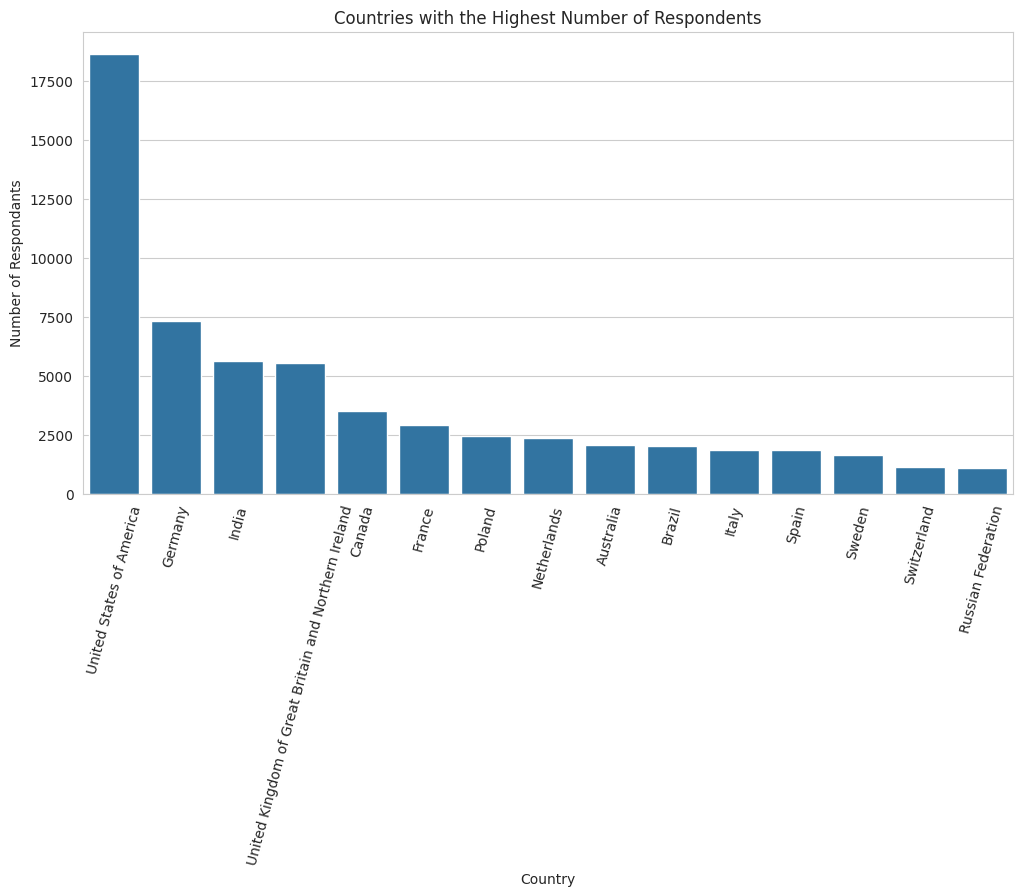

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_count.index, y=highest_count)

plt.title('Countries with the Highest Number of Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondants')
plt.xticks(rotation=75)

Here are some insights:

(i) The United States of America has the highest number of respondents, significantly more than any other country, indicating a large representation of American developers in the survey

(ii) Germany, India, the United Kingdom, and France are also prominently represented, showing strong participation from European developers.

(iii) Countries like Dominica, North Korea, Timor-Leste, and others show minimal representation, which might be due to a smaller developer community or limited access to the survey. Some countries with low counts may also face restrictions in internet access or participation in global surveys.

(iv) The survey was conducted in English, which could limit participation from non-English speaking countries. This language barrier might prevent non-English speaking developers from participating, thus skewing the results towards English-speaking countries.

(v)  Most popular programming languages and resources are in English. Developers who are not proficient in English might have been discouraged from participating, or their responses might be underrepresented.

(vi) The highest number of respondents come from the United States, followed by countries like India, the United Kingdom, and Canada, which have large English-speaking populations. This overrepresentation could skew the results to reflect the preferences and experiences of developers from these regions more prominently.

(vii) Countries with fewer English speakers or less internet access, such as some African and Asian nations, have lower participation. Programmers from non-English speaking regions are certainly underrepresented. This underrepresentation could lead to a less comprehensive view of the global programming community.

Now, let's try to find the percentage of respones from English-speaking vs non-English speaking countries. For this, let's load another dataset.

In [ ]:
languages_df = pd.read_csv('/kaggle/input/languages-spoken-in-countries/countries-languages - countries-languages.csv')

Let's view the first few rows of this dataset.

In [ ]:
languages_df.head(10)

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
5,Antigua and Barbuda,"English (official), local dialects"
6,Argentina,"Spanish (official), English, Italian, German, ..."
7,Armenia,"Armenian 98%, Yezidi, Russian"
8,Australia,"English 79%, native and other languages"
9,Austria,"German (official nationwide); Slovene, Croatia..."


Now, let's add a new column to this dataframe called "Is_English_Speaking". This column will have True or False values depending on whether the country is English speaking or not.

In [ ]:
languages_df['Is_English_Speaking'] = languages_df['Languages Spoken'].str.contains('English', case=False)

Now, let's merge our original dataset with the language dataset.

In [ ]:
merged_df = survey_df.merge(languages_df, on = "Country")

In [ ]:
English_Speaking = merged_df.groupby("Country")["Is_English_Speaking"].sum().to_frame()

In [ ]:
English_Speaking.sort_values('Is_English_Speaking', ascending = False).head(10)

,Is_English_Speaking
Country,
United States of America,18647
India,5625
United Kingdom of Great Britain and Northern Ireland,5552
Canada,3507
Australia,2078
Brazil,2042
Israel,921
Denmark,850
New Zealand,672


Now, let's find the percentage of respones from English-speaking vs non-English speaking countries

In [ ]:
total_respondants = survey_df.shape[0]
english_speaking_responses = English_Speaking["Is_English_Speaking"].sum()
percentage_english_speaking = (english_speaking_responses / total_respondants) * 100

print("Percent of responses of English-speaking countries is: {}".format(percentage_english_speaking))

Percent of responses of English-speaking countries is: 53.33692142088267


In the current survey, 53.34% of the responses came from English-speaking countries. This indicates that more than half of the survey participants are from countries where English is either an official or widely spoken language.

Following is a similar analysis I had conducted on the 2020 Stack Overflow Data:

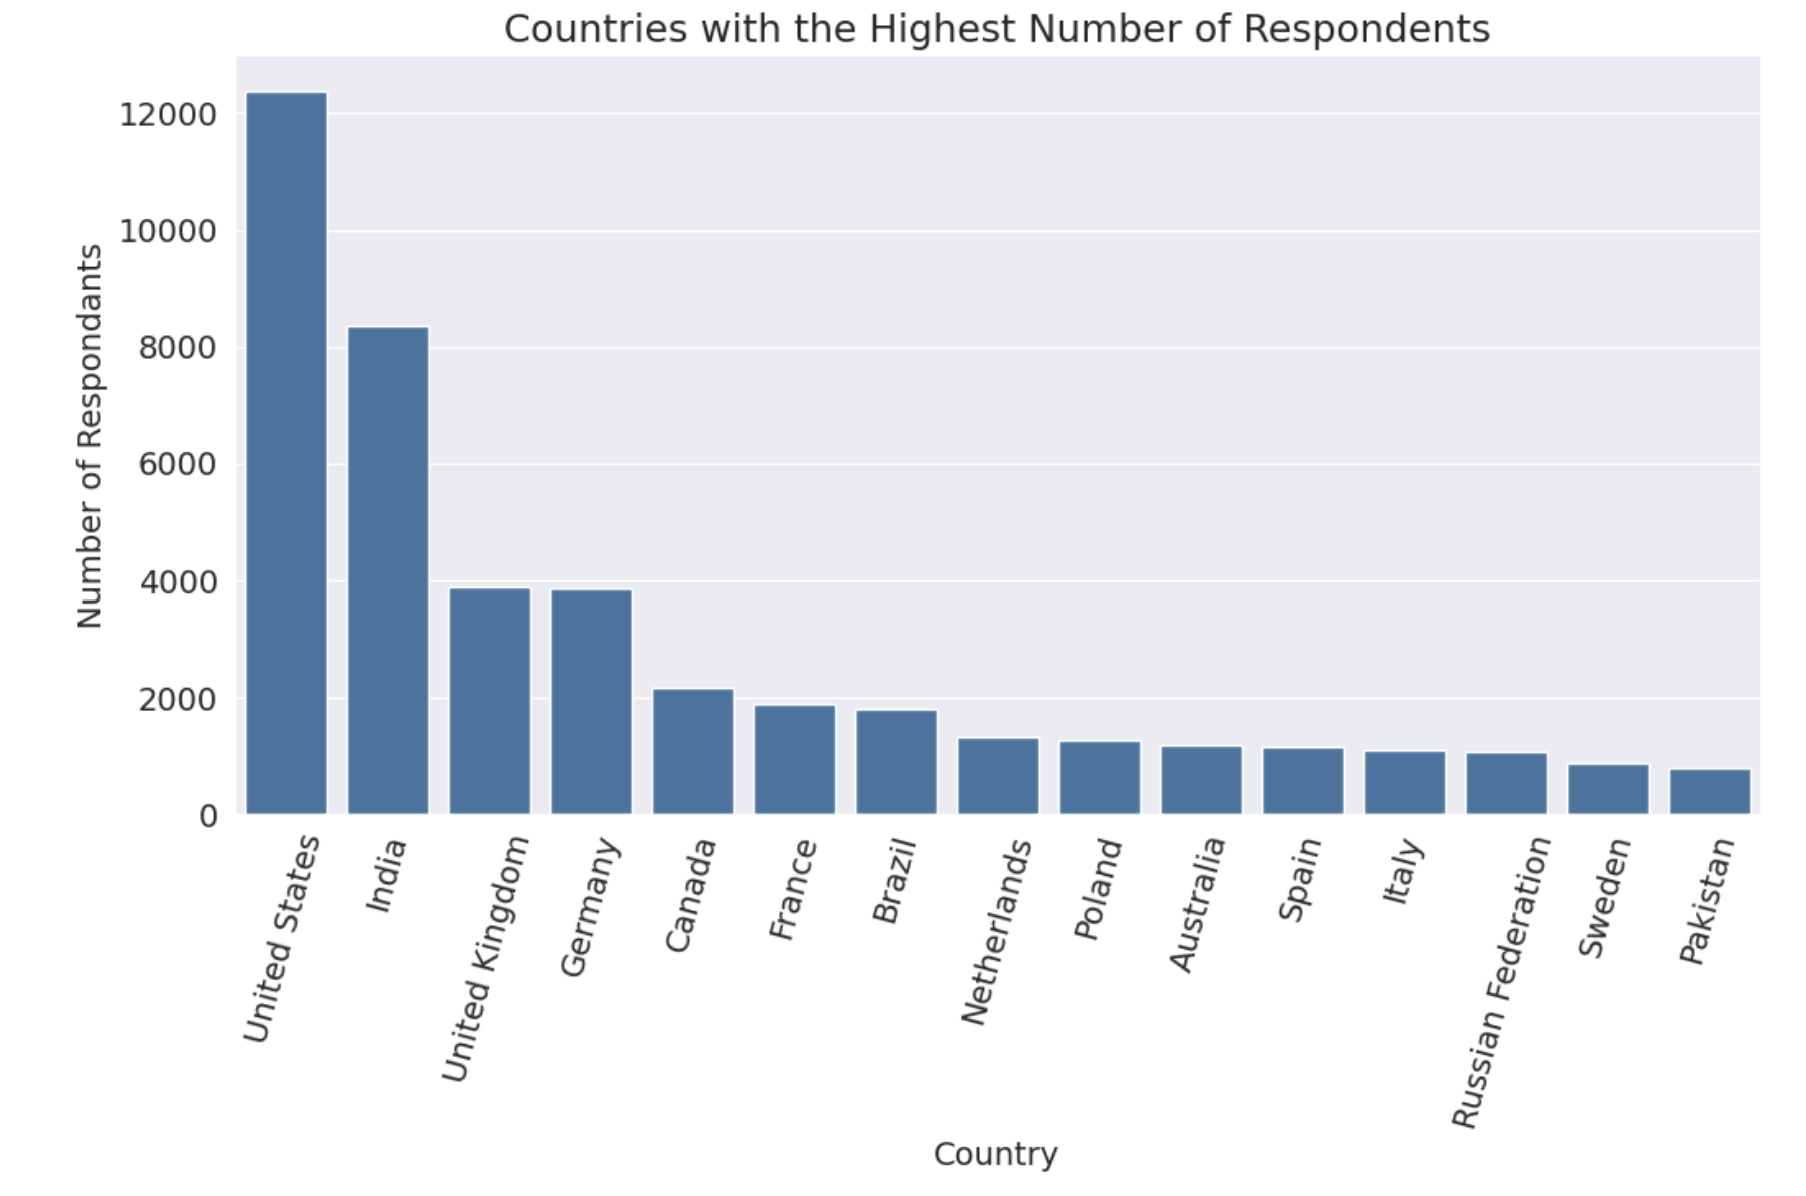

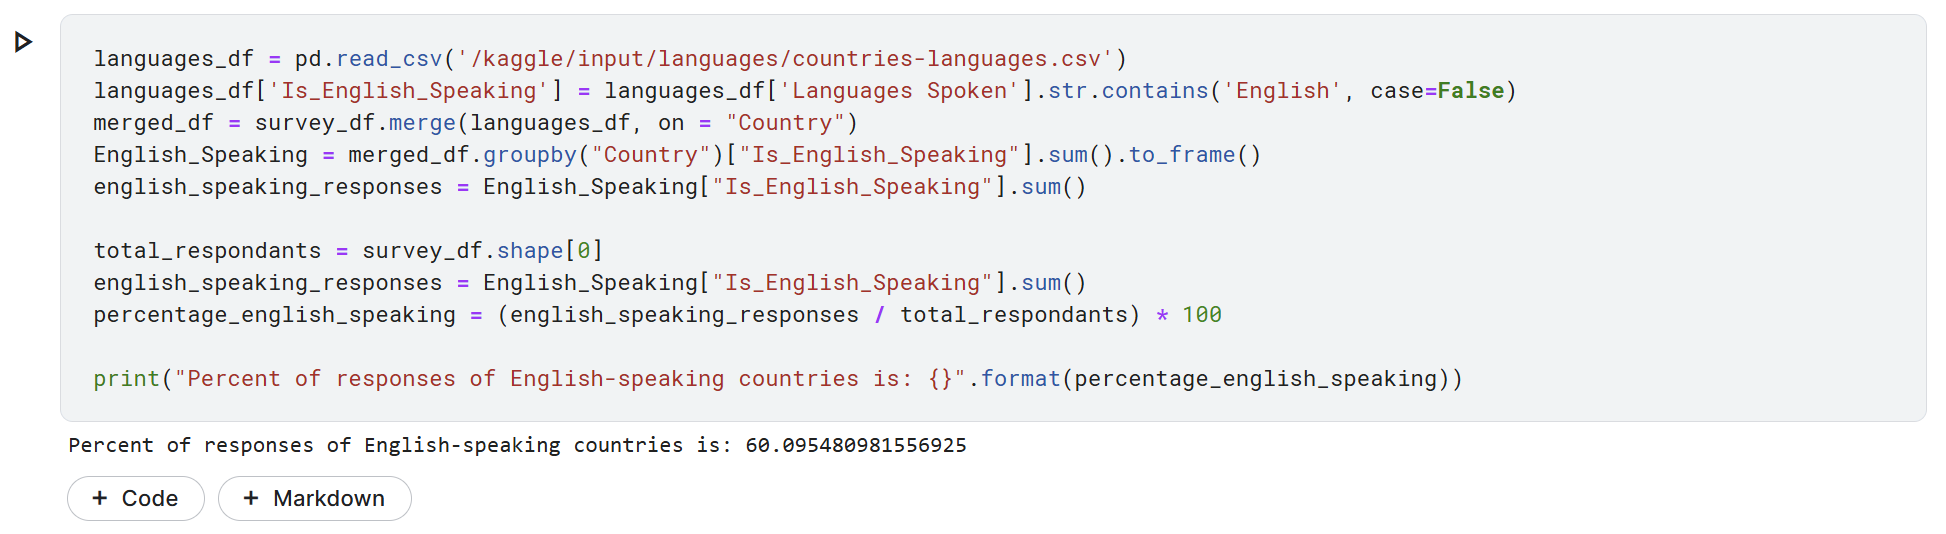

In the 2020 survey, 60.10% of the responses were from English-speaking countries. The high percentage of responses from English-speaking countries suggests a potential bias towards English-speaking developers. However, there is a noticeable decrease in the percentage of responses from English-speaking countries in 2023, dropping by approximately 6.76%. This is encouraging as it may indicate more non-English speaking developers are taking forth the intiative to complete the survey. Providing the survey in multiple languages could encourage more participation from non-English-speaking countries, thus balancing the representation. Efforts to increase participation from non-English-speaking countries could enhance the diversity and representativeness of the survey.

### Age

Analyzing the age distribution and related factors can provide valuable insights into the demographics and experiences of the respondents

In [ ]:
survey_df["Age"].unique()

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

For this analysis, let's try to focus on those respondants who've actually specified their age. So, let's create a new dataframe after dropping all the rows where age was specified as 'Prefer not to say',

In [ ]:
age_df =  survey_df[survey_df['Age'] != 'Prefer not to say']

# Define the custom order for the age categories
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]

# Convert the 'Age' column to a categorical type with the custom order
age_df['Age'] = pd.Categorical(age_df['Age'], categories=age_order, ordered=True)

# Sort the DataFrame by the 'Age' column
age_df = age_df.sort_values(by='Age')

/tmp/ipykernel_33/213019678.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['Age'] = pd.Categorical(age_df['Age'], categories=age_order, ordered=True)


In [ ]:
age_counts = age_df['Age'].value_counts()
percentiles = (age_counts / total_respondants) * 100
percentiles_df = percentiles.reset_index()
percentiles_df.columns = ['Age', 'Percentage']
print(percentiles_df)

                  Age  Percentage
0     25-34 years old   37.279108
1     35-44 years old   23.022067
2     18-24 years old   20.105624
3     45-54 years old    9.344726
4  Under 18 years old    4.628633
5     55-64 years old    3.803373
6   65 years or older    1.313016


Text(0, 0.5, 'Respondants')

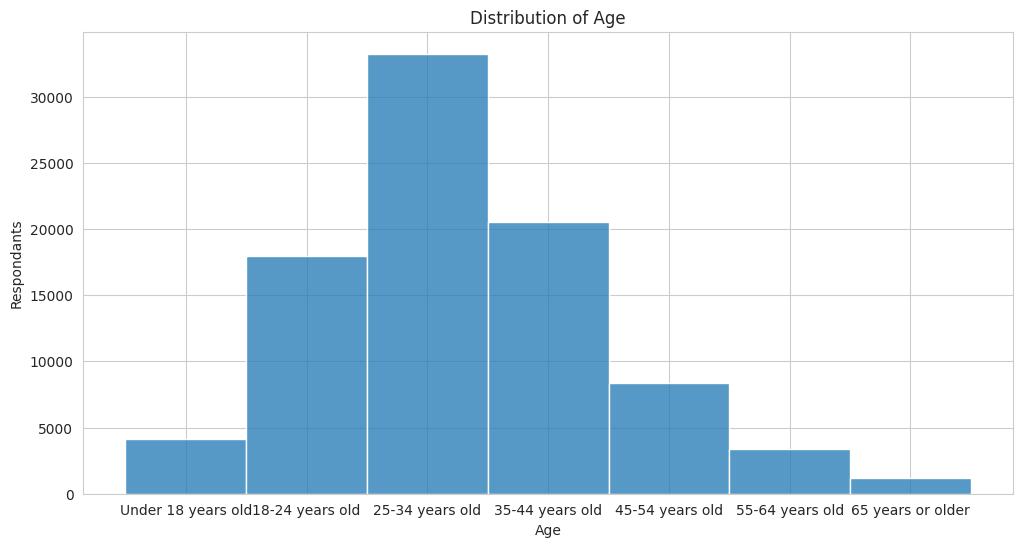

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(age_df['Age'], bins=7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Respondants')

**Initial Analysis**

(i) 25-34 years old: From the analysis that we have conducted above, it is clear that majority of the respondants (37.28% in particular) are 25-34 years old. This is expected as this age range typically includes early to mid-career professionals who are actively engaged in their careers and likely to participate in industry surveys. This group is likely to drive trends and influence future developments in the tech field.

(ii) 35-44 years old: The second-largest group, comprising 23.02% of respondents. This age group often includes experienced professionals who have been in the industry for a significant amount of time. It's clear that many professionals continue to engage actively with their careers and contribute significantly to the industry.

(iii) 18-24 years old: Representing 20.11% of respondents, this group likely includes students and early-career professionals just starting in the field. This indicates a healthy pipeline of new talent entering the tech industry.

(iv) 45-54 years old: Making up 9.34% of the respondents, this age group consists of senior professionals and those who have been in the industry for a long time. These individuals bring extensive experience and expertise to the field.

(v) Under 18 years old: At 4.63%, this group likely includes young enthusiasts and students who are interested in coding and technology. This early engagement could lead to a more skilled and prepared future workforce.

(vi) 55-64 years old: Comprising 3.80% of respondents, this group represents those nearing retirement or possibly switching to different roles within the industry.

(vii) 65 years or older: The smallest group at 1.31%, likely consisting of highly experienced professionals who have had long careers in technology.


The diversity in age groups among respondents suggests a wide range of perspectives and experiences, which can enrich the industry through varied approaches and solutions to challenges.

Let's also investigate the relationship between age and years of professional coding experience. Here was the question that was asked to the respondants:

In [ ]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

/tmp/ipykernel_33/2344085805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='YearsCodePro', data=age_df, palette='viridis')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Under 18 years old'),
  Text(1, 0, '18-24 years old'),
  Text(2, 0, '25-34 years old'),
  Text(3, 0, '35-44 years old'),
  Text(4, 0, '45-54 years old'),
  Text(5, 0, '55-64 years old'),
  Text(6, 0, '65 years or older')])

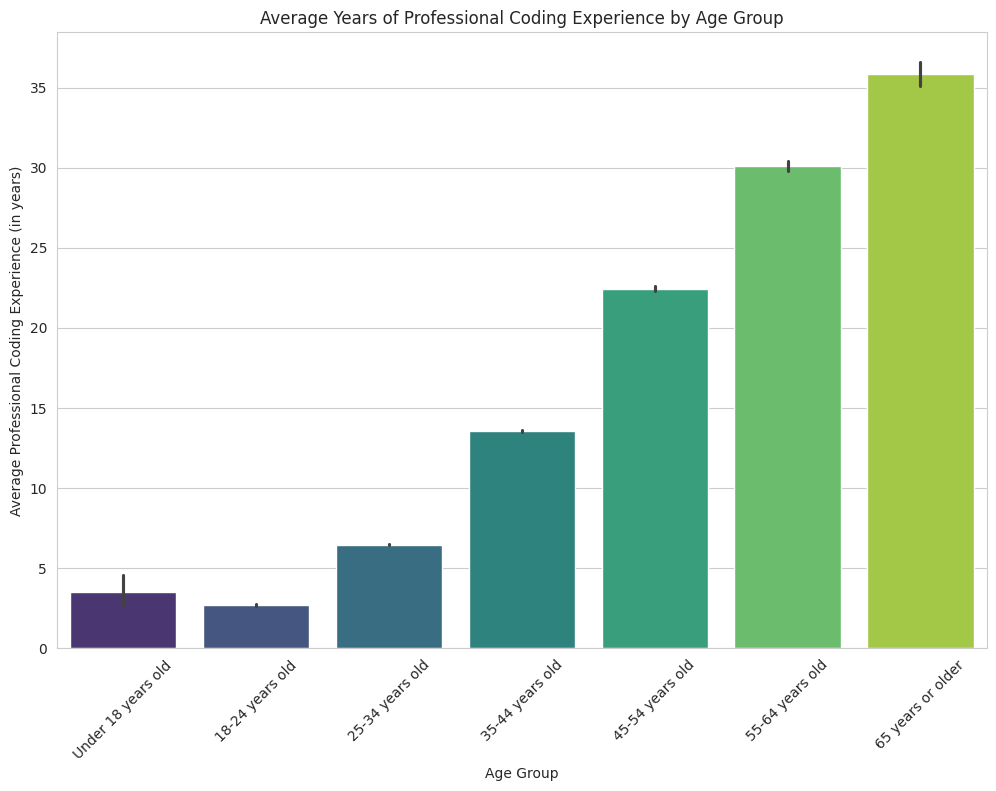

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='YearsCodePro', data=age_df, palette='viridis')
plt.title('Average Years of Professional Coding Experience by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Professional Coding Experience (in years)')
plt.xticks(rotation=45)

Here are some insights on this analysis:

(i) The average years of professional coding experience increase linearly with age. This is expected, as older respondents have had more time to gain experience in the field.

(ii) Respondents under 18 years old have a surprisingly high average professional coding experience compared to the 18-24 age group. This could indicate that younger individuals are starting to code professionally at an earlier age, possibly due to increased access to online learning resources and coding bootcamps.

(iii) The age group 25-34 years old has a significant increase in average professional coding experience compared to the 18-24 age group. This likely reflects the period when many individuals transition from education to full-time professional work.

(iv) The 35-44 and 45-54 age groups show steady growth in average professional coding experience. These age groups likely include many individuals who have established their careers and have accumulated substantial experience.

(v) The 55-64 and 65+ age groups have the highest average years of professional coding experience. This indicates that many respondents in these age groups have had long careers in coding, potentially spanning several decades.

### Education Level

While formal education in computer science is traditionally viewed as a critical path to becoming a programmer, the increasing availability of online resources and tutorials has provided alternative routes into the field. Understanding the educational background of developers can offer insights into the importance of formal education versus self-taught methods. In this section, we'll compare the education levels of survey respondents to explore this dynamic. Here was the question that was asked to the respondants:

In [ ]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [ ]:
Education_Level = survey_df["EdLevel"].value_counts()
Education_Level

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          36706
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Some college/university study without earning a degree                                11753
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Associate degree (A.A., A.S., etc.)                                                    2807
Primary/elementary school                                                              1905
Something else                                                                         1475
Name: count, dtype: int64

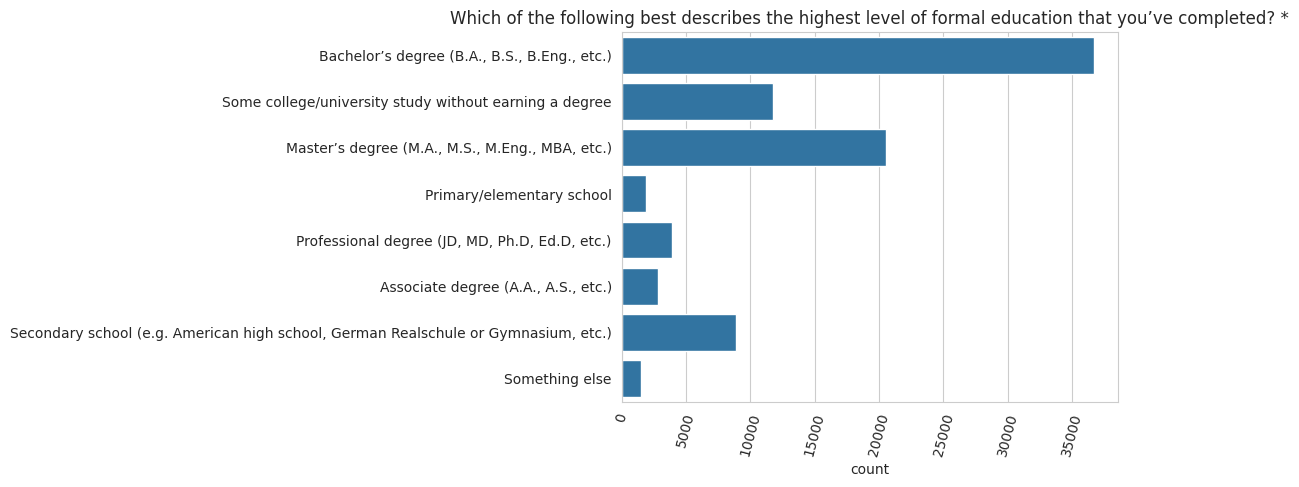

In [ ]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Here are some insights:

(i) The largest group of respondents hold a bachelor’s degree, with a count of 36,706. This indicates that a bachelor's degree remains the most common educational attainment among developers, aligning with the traditional view that a bachelor's degree is a critical entry point into the tech industry.

(ii) The second largest group comprises those with a master’s degree, totaling 20,543 respondents. This highlights that advanced education is also prevalent among developers, suggesting that many individuals pursue further education to gain specialized knowledge and skills.

(iii)  There are 3,887 respondents with professional degrees (JD, MD, Ph.D., Ed.D, etc.), indicating that a portion of the developer community holds highly specialized and advanced qualifications. This group may represent individuals in academic or research-oriented roles within the tech industry.

(iv)  A notable 11,753 respondents have some college or university education but did not earn a degree. This suggests that many developers enter the industry without completing formal education, possibly leveraging self-study, bootcamps, or on-the-job learning. This is a good sign pointing towards the fact that people can enter the industry without any professional degrees as long as they put some effort from their part, possibly by leveraging the several online resources available to us these days.

(v) The “Something else” category, with 1,475 respondents, likely includes individuals who have completed coding bootcamps or other non-traditional education paths. This highlights the growing acceptance and success of alternative education methods in the tech industry.

(vi) There are 8,897 respondents with only a secondary school education. This shows that a substantial number of developers start their careers with a high school diploma, emphasizing the importance of self-study and practical experience in the industry.

(vii) Surprisingly, 1,905 respondents have only primary or elementary education. This group might consist of young learners or individuals who started coding early and gained substantial skills without formal education.


The distribution of education levels among respondents provides a comprehensive view of the diverse educational backgrounds in the programming community. While traditional education paths like bachelor's and master's degrees dominate, there is significant representation from alternative education methods and non-degree holders. This diversity underscores the varied paths individuals take to enter and succeed in the tech industry, highlighting the importance of both formal education and self-directed learning.

Now, lets analyse the most common methods of learning code through a pie chart. Here was the question that was asked to the respondants:

In [ ]:
schema.LearnCode

'How do you learn to code? Select all that apply.'

In [ ]:
survey_df["LearnCode"].unique()[0:5]

array([nan,
       'Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)',
       'Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)',
       'Colleague;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)',
       'Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)'],
      dtype=object)

Clearly, this column has values which in turn consists of multiple methods that the respondants used in order to learn code. Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
new_df = split_multicolumn(survey_df.LearnCode)

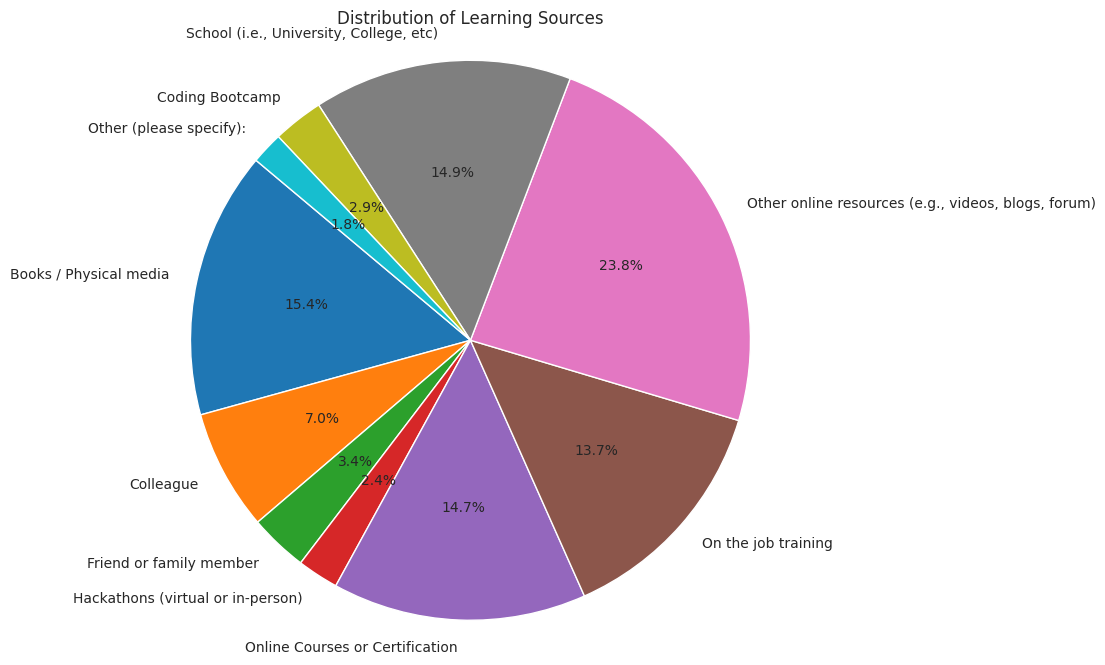

In [ ]:
learning_sources_counts = new_df.sum()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(learning_sources_counts, labels=learning_sources_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Learning Sources')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We make an interesting observation here: although more than 60% of the respondents have some sort of professional degree in computer science, only 14.9% of the respondents mentioned School/University/College as their source of learning to code. In contrast, 59.2% of the respondents have mentioned other sources such as videos, online courses, bootcamps, books, hackathons, etc., as their learning sources. This indicates that many individuals in the programming community rely heavily on alternative learning methods outside of traditional educational institutions which again indicates that people can enter this industry even without any university degree in CS.

Now, let's analyse if there is any correlation between age groups and the resources they use to learn how to code.

In [ ]:
learn_code_df = age_df[['Age']].join(new_df)

# Calculate the frequency of each learning method for each age group
learn_code_frequency = learn_code_df.groupby('Age').sum()

# Convert the frequency to percentage
learn_code_percentage = learn_code_frequency.div(learn_code_frequency.sum(axis=1), axis=0) * 100

/tmp/ipykernel_33/853375940.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  learn_code_frequency = learn_code_df.groupby('Age').sum()


In [ ]:
learn_code_frequency

,Books / Physical media,Colleague,Friend or family member,Hackathons (virtual or in-person),Online Courses or Certification,On the job training,"Other online resources (e.g., videos, blogs, forum)","School (i.e., University, College, etc)",Coding Bootcamp,Other (please specify):
Age,,,,,,,,,,
Under 18 years old,1419,158,759,334,1551,253,3469,1344,407,419
18-24 years old,6588,3030,2510,1901,8381,5630,14727,10860,1969,988
25-34 years old,15770,8734,3674,2855,16980,16781,26102,17970,3478,1695
35-44 years old,12269,5595,2075,1394,10323,10810,16139,8901,1822,1284
45-54 years old,5787,2061,626,396,3936,4450,6445,3030,587,632
55-64 years old,2534,721,180,106,1511,1815,2430,1280,247,273
65 years or older,894,179,53,20,405,563,713,450,64,114


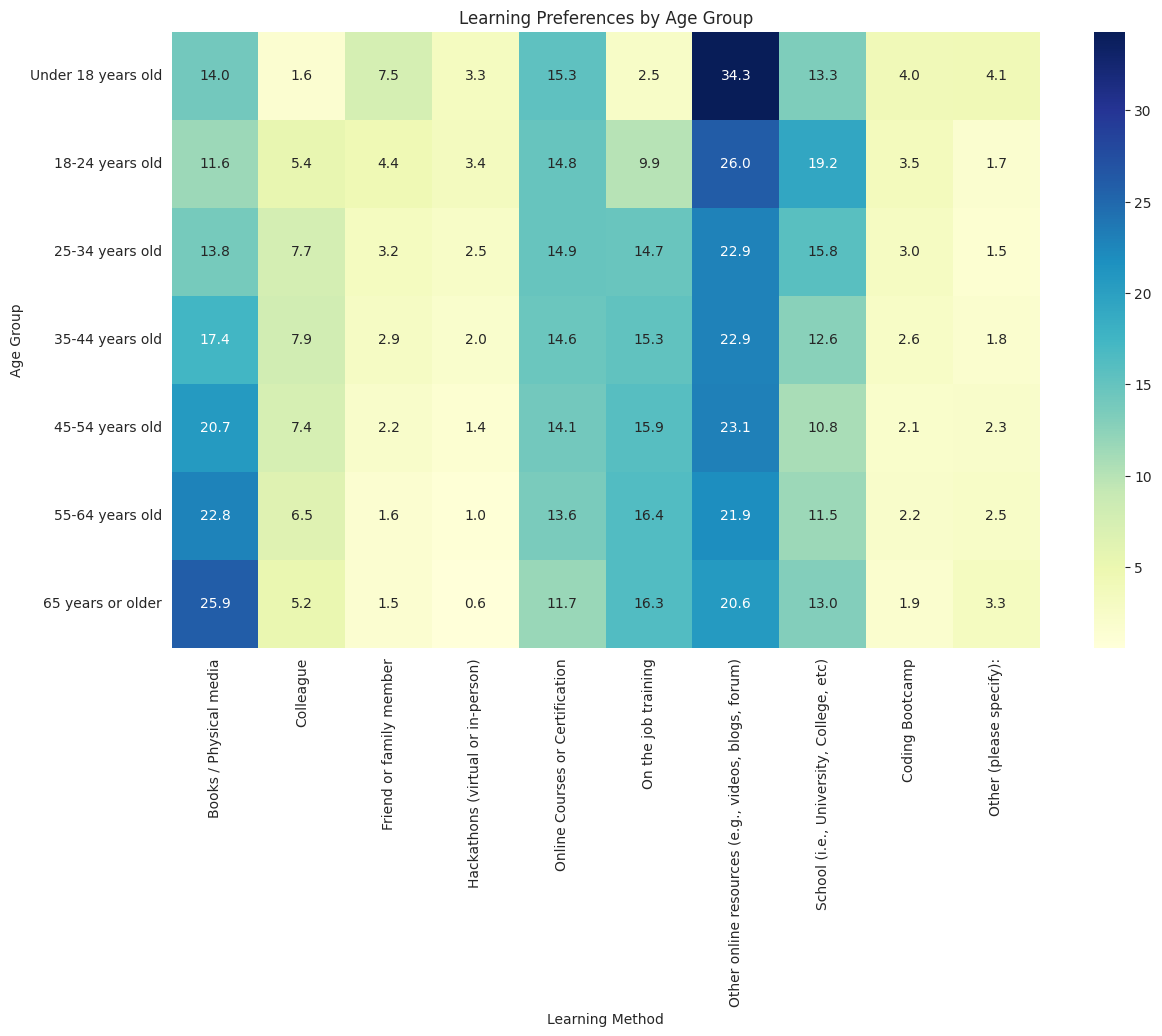

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(learn_code_percentage, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Learning Preferences by Age Group')
plt.xlabel('Learning Method')
plt.ylabel('Age Group')
plt.show()

Here we make some obervations:

(i) As we might have predicted, the under 18 age group primarily learn how to code using online resources like videos & blogs. They also complete online courses or certifications. This preference for digital learning methods is likely due to their familiarity and comfort with technology from a young age. Moreover, the accessibility and affordability of these resources make them a popular choice among younger learners. A good fraction of learners also use books and other physical media to learn coding. Another significant portion of learners have learnt coding from school. Additionally, online resources and certifications remain the most dominant method for learning to code across all age groups as these methods provide flexibility, affordability, and a wide range of content, catering to various learning preferences and needs.

(ii) On-the-job training is not particularly significant among the under 18 and 18-24 age groups. However, starting the 25-34 age group and so on, On-the-job training is a significant emthod to learn to code. This trend suggests that hands-on experience and practical learning in a work environment are highly valued by professionals, especially those in the early to mid-stages of their careers. Interestingly, the reliance on on-the-job training peaks among those above 65, indicating that older professionals continue to value and engage in practical learning throughout their careers.

(iii) Online courses and certifications are consistently popular among all age groups. This indicates the value placed on structured, formal learning paths available online. They serve as a bridge between informal learning and traditional education, offering flexibility and credibility. Additionally, as noted before, there was a significant proportion of individuals that code without formal education in CS. These people would have utilized such resources, which are becoming increasingly pepopular among learners as a way to boost their skillset.

(iv) The use of books and physical media for learning to code increases progressively with age. While these resources are moderately used by respondents under 18, they become the most dominant source of learning for those aged 65 and older. This trend suggests that older generations may prefer traditional, tangible methods of learning, possibly due to their established comfort with these media.

(v) Schools remain a significant source of learning for younger respondents. Despite the growing popularity of digital learning methods, traditional educational institutions continue to play an essential role in coding education for younger learners.

(vi) Colleague-based learning is notably prevalent among the age group 25-54. This trend makes sense as individuals in their professional careers and companies often learn from each other and engage in collaborative learning environments. It highlights the importance of workplace learning and peer-to-peer knowledge sharing.

(vii) Hackathons and coding bootcamps are not visibly common ways to learn to code. However, these methods have significant potential for immersive and practical learning experiences. Encouraging participation in such events can provide valuable hands-on experience and enhance coding skills.


### Employment

Employment patterns among programmers can provide valuable insights into the industry. Freelancing or contract work is a common choice among programmers, allowing for flexibility and a variety of work experiences. On the other hand, full-time and part-time employment offers stability and long-term career growth. Understanding these employment trends can help identify the preferences and working conditions of programmers across different demographics. Here was the question that was asked to the respondants:

In [ ]:
schema.Employment

'Which of the following best describes your current employment status? Select all that apply.'

In [ ]:
Employment_Level = survey_df["Employment"].value_counts()
Employment_Level

Employment
Employed, full-time                                                                                                                                                                                             53748
Student, full-time                                                                                                                                                                                               7430
Independent contractor, freelancer, or self-employed                                                                                                                                                             7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         4354
Not employed, but looking for work                                                                                                   

Again we notice that some of the data in this column have multiple employment statuses which we have to seperate for our analysis. Let's use the split_multicolumn() function that we had defined eariler to convert this data frame into a data frame with one column for each possible option.

In [ ]:
new_employment_df = split_multicolumn(survey_df.Employment)

In [ ]:
new_employment_df

,"Employed, full-time","Independent contractor, freelancer, or self-employed","Not employed, but looking for work","Student, full-time","Employed, part-time","Student, part-time",I prefer not to say,Retired,"Not employed, and not looking for work"
0,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
89179,True,True,False,False,False,False,False,False,False
89180,False,False,False,True,True,False,False,False,False
89181,False,False,False,False,False,False,True,False,False
89182,False,False,False,False,True,True,False,False,False


In [ ]:
employment_counts = new_employment_df.sum()
total_counts = employment_counts.sum()
percentiles2 = (employment_counts / total_counts) * 100
percentiles2

Employed, full-time                                     59.752939
Independent contractor, freelancer, or self-employed    13.724759
Not employed, but looking for work                       4.099374
Student, full-time                                      11.546537
Employed, part-time                                      4.934359
Student, part-time                                       3.326203
I prefer not to say                                      0.538668
Retired                                                  0.723130
Not employed, and not looking for work                   1.354030
dtype: float64

Now, we visualise this  data using a pie chart.

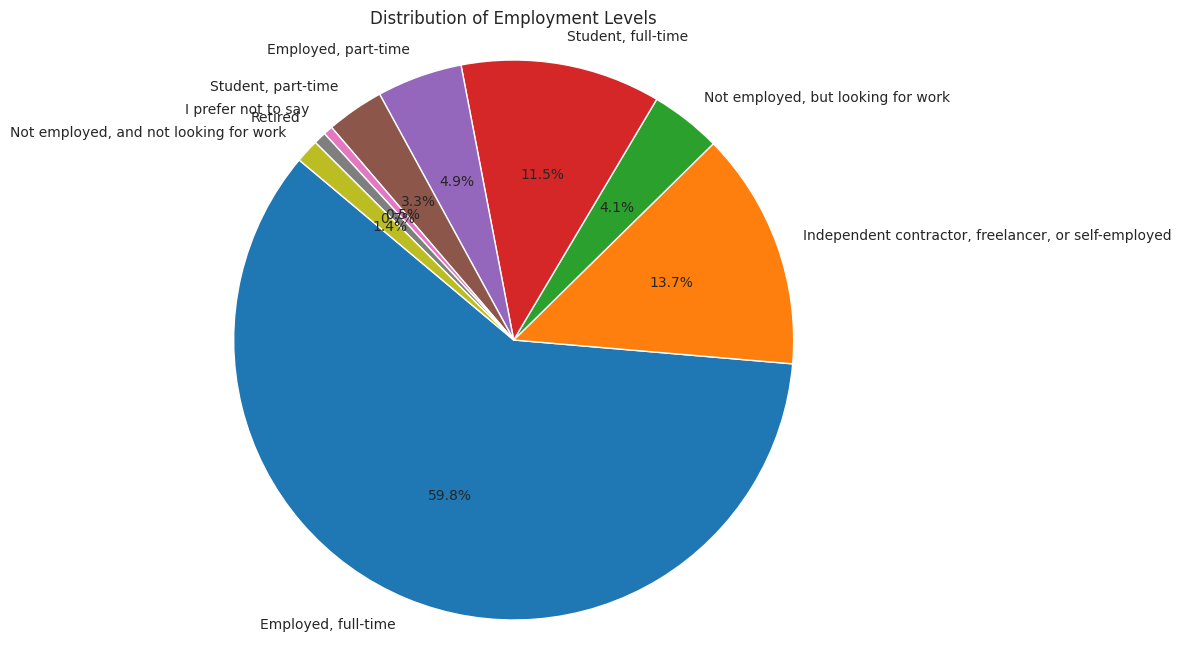

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(percentiles2, labels=percentiles2.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employment Levels')
plt.axis('equal')
plt.show()

**Initial Analysis**


(i) The largest category of respondents is those who are employed full-time, accounting for nearly 60% of the total. This indicates a stable job market for programmers and developers, where a significant majority have secured full-time positions. The prevalence of full-time employment suggests that many developers have found stable, long-term employment opportunities.

(ii) Around 14% of respondents identify as independent contractors, freelancers, or self-employed. This highlights the flexibility and diversity within the tech industry, where a considerable portion of the workforce prefers or relies on freelance work. This might be due to the high demand for specific skills, allowing professionals to work on multiple projects or clients, and the growing gig economy.

(iii) About 15% of respondents are full-time students, reflecting the influx of new talent into the tech industry. This substantial student population indicates that there is a continuous flow of individuals entering the field, learning new skills, and preparing to join the workforce. It's crucial for educational institutions and online platforms to cater to this group to ensure they are well-prepared for industry demands.

(iv) Approximately 5% of respondents work part-time, which may include students, individuals transitioning between jobs, or those balancing work with other responsibilities. Part-time work can serve as a valuable experience, allowing individuals to gain industry exposure while managing other commitments.

(v) About 4% of respondents are currently not employed but are actively looking for work. This indicates a certain level of job mobility and possibly some friction in the job market where skills and opportunities are not perfectly aligned. This group might benefit from targeted job placement programs and skill enhancement initiatives.

(vi)  A small percentage (around 1.35%) of respondents are not employed and not looking for work. This group might include individuals taking a career break, focusing on personal projects, or those satisfied with their current non-working status. Finally, less than 1% of respondents are retired, reflecting the relatively young demographic of the tech workforce. This might indicate privacy concerns or uncertainty about their current employment situation.



Here are some insights:

(i) The significant portion of freelancers and self-employed individuals suggests a dynamic job market with high demand for specialized skills. Companies might prefer hiring freelancers for short-term projects requiring specific expertise, which can be cost-effective and flexible.

(ii) The high percentage of full-time employed respondents alongside a substantial number of full-time students indicates a potential correlation between educational attainment and job security.

(iii) The presence of part-time workers and those not seeking employment might reflect an evolving attitude towards work-life balance in the tech industry. This trend could be driven by the increasing availability of remote work and flexible job arrangements.

(iv) The significant number of freelancers highlights the viability of freelancing as a long-term career path. This could lead to a growing market for platforms and services that cater to freelance professionals, such as project management tools, networking opportunities, and financial planning services.

(v) With a noticeable percentage of respondents actively looking for work, there is an opportunity for career services, job fairs, and online job portals to bridge the gap between job seekers and employers. Enhancing skill development programs and offering career guidance could further support this group.

(vi) The diverse employment statuses reflect how technological advancements and the evolving nature of work impact the job market. For instance, the rise of remote work, online education, and the gig economy are reshaping traditional employment models, creating new opportunities and challenges.

There seems to be a significant number of part-time workers. Let's analyse if there is any correlation between an individual's employment level and their preference for remote work.

First, let's view the question that was asked to the respondants-

In [ ]:
schema.RemoteWork

'Which best describes your current work situation?'

In [ ]:
remote_work_df = survey_df[['RemoteWork']]
combined_df = remote_work_df.join(new_employment_df)

In [ ]:
combined_df

,RemoteWork,"Employed, full-time","Independent contractor, freelancer, or self-employed","Not employed, but looking for work","Student, full-time","Employed, part-time","Student, part-time",I prefer not to say,Retired,"Not employed, and not looking for work"
0,NaN,False,False,False,False,False,False,False,False,False
1,Remote,True,False,False,False,False,False,False,False,False
2,"Hybrid (some remote, some in-person)",True,False,False,False,False,False,False,False,False
3,"Hybrid (some remote, some in-person)",True,False,False,False,False,False,False,False,False
4,Remote,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
89179,Remote,True,True,False,False,False,False,False,False,False
89180,"Hybrid (some remote, some in-person)",False,False,False,True,True,False,False,False,False
89181,NaN,False,False,False,False,False,False,True,False,False
89182,"Hybrid (some remote, some in-person)",False,False,False,False,True,True,False,False,False


<Figure size 1400x800 with 0 Axes>

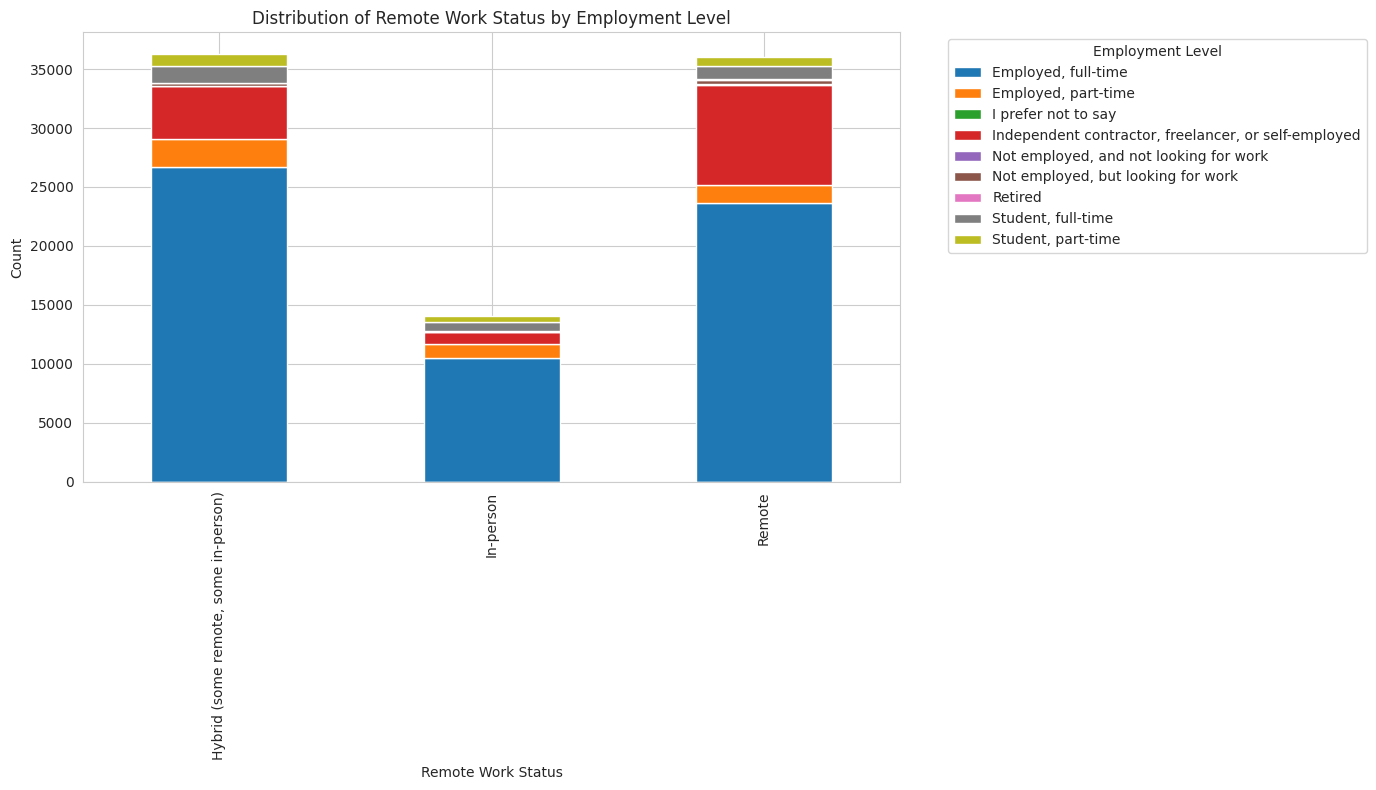

In [ ]:
remote_frequency = combined_df.groupby('RemoteWork').sum()
remote_percentage = remote_frequency.div(remote_frequency.sum(axis=1), axis=0) * 100


# Create a pivot table
pivot_table = combined_df.pivot_table(index='RemoteWork', aggfunc='sum')

plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribution of Remote Work Status by Employment Level')
plt.xlabel('Remote Work Status')
plt.ylabel('Count')
plt.legend(title='Employment Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Initial Analysis**

(i) A significant portion of people in the CS field have adopted either a hybrid work format or full remote work. This trend reflects the industry's flexibility and adaptability to remote working conditions, likely accelerated by the global events such as the COVID-19 pandemic.

(ii) Most full-time employees now work in a hybrid format, balancing both in-office and remote work. However, there is also a notable number of full-time employees who work entirely remotely. This indicates that companies are increasingly offering flexible work arrangements to their full-time staff.

(iii) Independent contractors, freelancers, and part-time employees predominantly work remotely. This is likely because these roles typically offer greater flexibility and autonomy, allowing individuals to work from various locations. For independent contractors and freelancers, remote work is often a necessity, as their clients might be geographically dispersed.

(iv) Full-time and part-time students have a varied approach to remote work. While some students might engage in internships or part-time work remotely, many still require in-person attendance for their educational activities. This dual nature of their commitments reflects in their remote work status.


Here are some insights:

(i) The shift towards remote and hybrid work indicates that the technology industry has adapted well to the challenges posed by the need for remote work. This adaptation could lead to long-term changes in how companies operate, possibly maintaining remote work options even post-pandemic.

(ii The preference for remote work among various employment types suggests that many individuals find remote work to be more productive and satisfactory. Companies might need to consider these preferences to retain talent and maintain high levels of employee satisfaction.

(iii) These trends might indicate a permanent change in the landscape of employment in the tech industry, where remote and hybrid work models become the norm rather than the exception.

Now, let's add a new column EmploymentType containing the values Enthusiast (student or not employed but looking for work), Professional (employed full-time, part-time or freelancing), and Other (not employed or retired).

In [ ]:
def determine_employment_type(row):
    if row['Student, full-time'] or row['Student, part-time'] or row['Not employed, but looking for work']:
        return "Enthusiast"
    elif row['Employed, full-time'] or row['Employed, part-time'] or row['Independent contractor, freelancer, or self-employed']:
        return "Professional"
    elif row['Not employed, and not looking for work'] or row['Retired']:
        return "Other"

survey_df['EmploymentType'] = new_employment_df.apply(determine_employment_type, axis=1)

print(survey_df[['Employment', 'EmploymentType']].sample(10))


                                              Employment EmploymentType
51501  Independent contractor, freelancer, or self-em...   Professional
16403                                Employed, full-time   Professional
227    Independent contractor, freelancer, or self-em...   Professional
54836                                            Retired          Other
63480             Employed, full-time;Student, full-time     Enthusiast
12170                                Employed, full-time   Professional
7046                                 Employed, full-time   Professional
62644                 Not employed, but looking for work     Enthusiast
83154                                Employed, full-time   Professional
414                                  Employed, full-time   Professional


In [ ]:
type_counts = survey_df["EmploymentType"].value_counts()
total_counts = type_counts.sum()
percentiles3 = (type_counts / total_counts) * 100
percentiles3

EmploymentType
Professional    77.64485
Enthusiast      20.70888
Other            1.64627
Name: count, dtype: float64

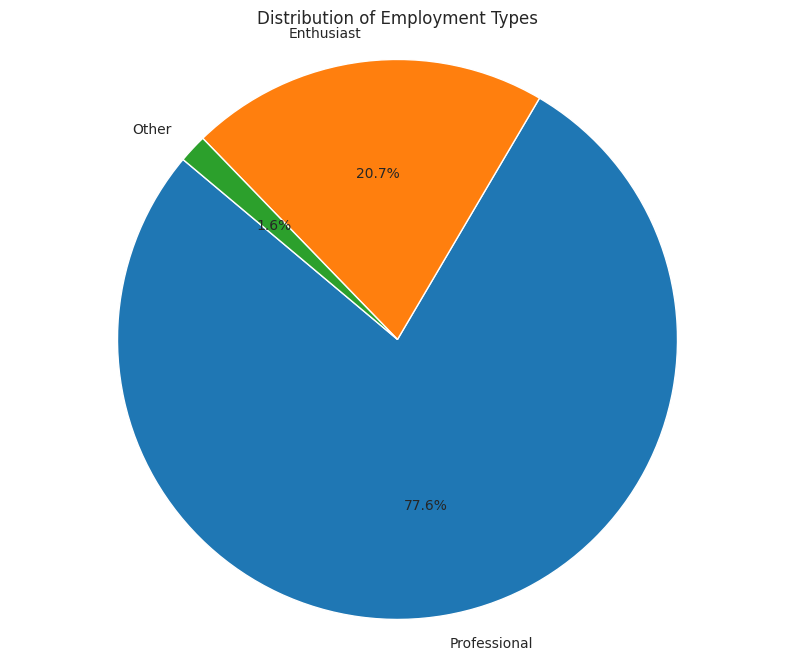

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(percentiles3, labels=percentiles3.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employment Types')
plt.axis('equal')
plt.show()

We observe the following information from the pie chart:

(i) Professional (77.64%): This group constitutes the majority of respondents, indicating that most participants are actively engaged in the workforce either as full-time employees, part-time workers, or freelancers. This high percentage underscores the prevalence of professional engagement within the coding community.

(ii) Enthusiast (20.71%): This significant portion of respondents includes students and those not currently employed but seeking work. The presence of a considerable number of enthusiasts highlights the strong interest and growing involvement in coding and technology among individuals who are not yet professionally employed.

(iii) Other (1.65%): This small segment includes respondents who are retired or not seeking employment. The low percentage suggests that the coding community is predominantly composed of active workers and aspiring professionals.

### Introduction to AI Tools and Technologies


In recent years, Artificial Intelligence (AI) has become a pivotal part of the technology landscape, driving innovations across various domains. The survey provides valuable insights into the AI tools and technologies that respondents have worked with and those they aspire to work with. This section focuses on analyzing respondents' experiences and preferences related to AI tools, specifically within the realms of AI search technologies and AI development tools. The data includes columns indicating which AI tools respondents have worked with ('AISearchHaveWorkedWith' and 'AIDevHaveWorkedWith') and which tools they want to work with in the future ('AISearchWantToWorkWith' and 'AIDevWantToWorkWith').

Let's start off by analyzing whether developers use AI in their development process. Here is the question that was asked to the respondants.

In [ ]:
schema.AISelect

'Do you currently use AI tools in your development process? *'

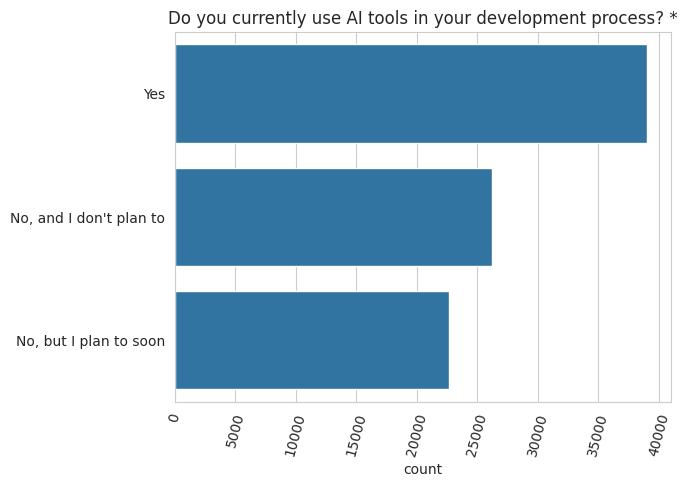

In [ ]:
AI_Use = survey_df["AISelect"].value_counts()

sns.countplot(y=survey_df.AISelect)
plt.xticks(rotation=75);
plt.title(schema['AISelect'])
plt.ylabel(None);

Here are some insights:

(i) Less than half of the respondents currently use AI tools in their development processes. This indicates that while AI is a growing field, it has not yet achieved widespread adoption among all developers.

(ii) Approximately one-quarter of the respondents who do not currently use AI tools expressed a desire to work with these technologies in the near future. This suggests a significant interest in AI and a potential for increased adoption as developers seek to expand their skill sets.

(iii) A notable portion of respondents indicated that they neither use AI tools currently nor plan to do so. This could be due to several factors, including the nature of their work, perceived complexity of AI technologies, or a lack of resources and training opportunities.

For those who do not plan to adopt AI tools, the reasons might include:

* Complexity: AI tools often require a deep understanding of both programming and mathematical concepts, which can be a barrier for some developers.
* Resource Constraints: Implementing AI solutions can be resource-intensive, requiring significant computational power and data.
* Relevance: AI might not be relevant to every developer's work, especially those in fields where traditional programming techniques suffice.

Now, let's analyze the opinion of the developers on using AI as a part of their development workflow. Here was the question that was asked to the respondants -

In [ ]:
schema.AISent

'How favorable is your stance on using AI tools as part of your development workflow?'

In [ ]:
AI_view_counts = survey_df["AISent"].value_counts()
total_AI_view_counts = AI_view_counts.sum()
percentiles4 = (AI_view_counts / total_AI_view_counts) * 100
percentiles4

AISent
Favorable           48.556934
Very favorable      27.723126
Indifferent         16.498919
Unsure               4.017821
Unfavorable          2.760931
Very unfavorable     0.442269
Name: count, dtype: float64

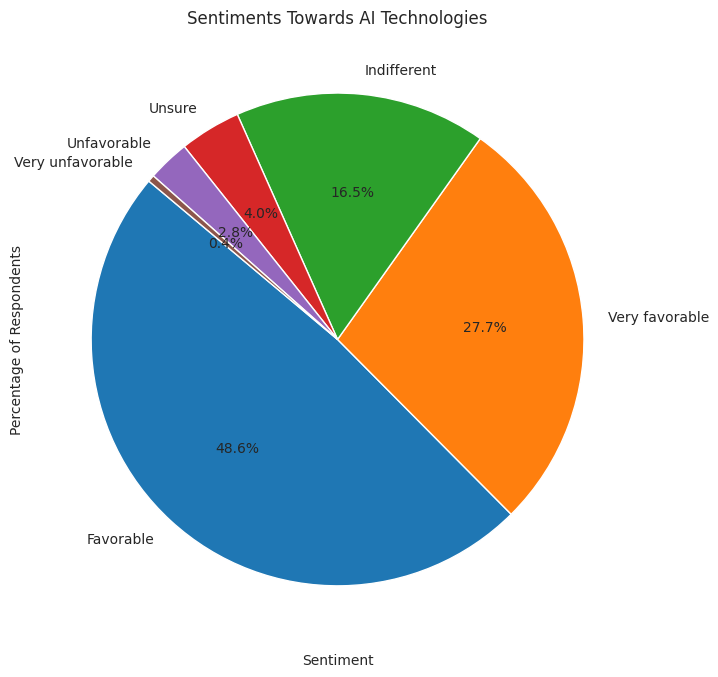

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(percentiles4, labels=percentiles4.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiments Towards AI Technologies')
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45)
plt.show()

Here are some insights:

(i) A significant majority of respondents have a positive view of AI technologies. Combining the "Favorable" and "Very favorable" categories, we see that over 76% of respondents view AI positively. This strong endorsement highlights the widespread enthusiasm and optimism about AI's potential and impact.

(ii) Approximately 16.5% of respondents are indifferent towards AI. This neutral stance could indicate that these individuals have yet to see AI's direct benefits in their work or that they are cautious about its potential impact. This group represents an opportunity for further education and engagement to showcase AI's value.

(iii) Only a small percentage of respondents hold negative views towards AI. The "Unfavorable" and "Very unfavorable" categories together account for about 3.2% of the total. This suggests that concerns about AI, while present, are not widespread. The low levels of negative sentiment could be attributed to growing awareness of AI's capabilities and its beneficial applications. Engaging with these respondents to understand their reservations can help create more inclusive and reassuring AI development and implementation strategies.

(iv) Around 4% of respondents are unsure about their stance on AI technologies. This uncertainty might stem from a lack of exposure or understanding of AI. Addressing this uncertainty through targeted information and educational resources could help more developers form informed opinions.

Now, lets try to find if there is any correlation between the age of the developer and their sentiments towards AI technologies

/tmp/ipykernel_33/1243235503.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = age_df.pivot_table(index='Age', columns='AISent', aggfunc='size', fill_value=0)


<Figure size 1400x800 with 0 Axes>

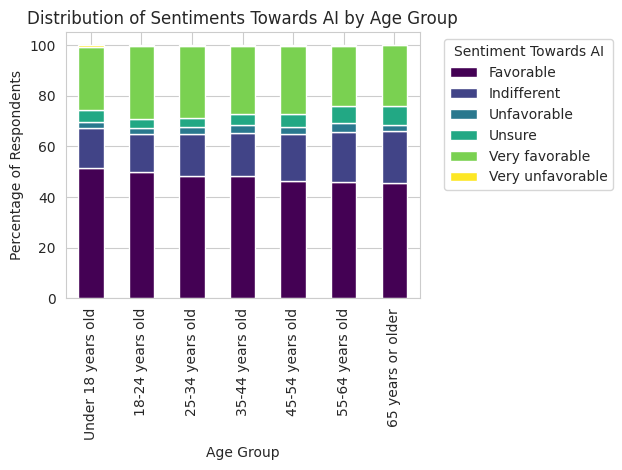

In [ ]:
# Create a pivot table with counts of sentiments for each age group
pivot_table = age_df.pivot_table(index='Age', columns='AISent', aggfunc='size', fill_value=0)

# Normalize the data to get percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))
pivot_table_percentage.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Sentiments Towards AI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Sentiment Towards AI', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In general, it seems like developers of all age groups are equally favorable towards AI. However, it is the youth, approximately 0-34 years old, who are more favorable towards AI, most probably because they are more exposed to and familiar with modern technologies from an early age. As the age group increases, developers appear slightly more unsure of AI technologies. There is also a group of people who find AI unfavorable, and this percentage is slightly higher in this age group than those in the 0-64 agr groups. This could be due to concerns about job displacement or skepticism about the potential ethical and societal impacts of AI.

Let's check how much fo people trust the accuracy of AI tools. Here was the question asked to the respondants.

In [ ]:
schema.AIBen

'How much do you trust the accuracy of the output from AI tools as part of your development workflow?'

In [ ]:
AI_ben_counts = survey_df["AIBen"].value_counts()
total_AI_ben_counts = AI_ben_counts.sum()
percentiles5 = (AI_ben_counts / total_AI_ben_counts) * 100
percentiles5

AIBen
Somewhat trust                39.298977
Neither trust nor distrust    30.681152
Somewhat distrust             21.711512
Highly distrust                5.456382
Highly trust                   2.851977
Name: count, dtype: float64

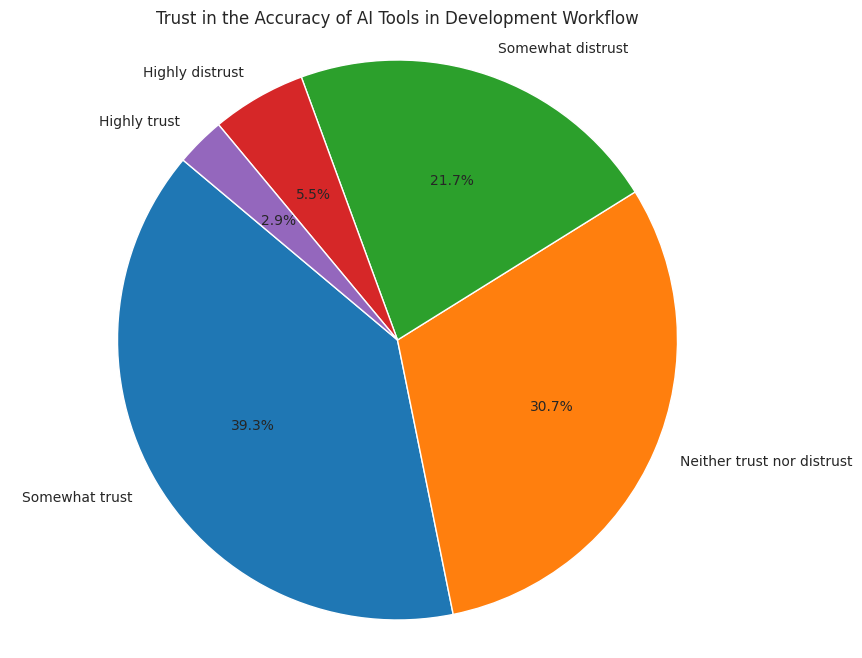

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(percentiles5, labels= percentiles5.index, autopct='%1.1f%%', startangle=140)
plt.title('Trust in the Accuracy of AI Tools in Development Workflow')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

AI tools are somewhat new to people, and their high capacity and surprising capabilities are progressively being discovered. It is understandable that the rate at which AI is able to perform tasks previously considered impossible by technology might cause some distrust among users. From the pie chart, we see that only 2.9% of respondents highly trust the accuracy of AI tools, while 39.3% somewhat trust them, and 30.7% neither trust nor distrust them. This distribution highlights a cautious optimism but also significant uncertainty. It is certain that AI is not always accurate and can make both major and minor mistakes in its work, contributing to the 21.7% of respondents who somewhat distrust and the 5.5% who highly distrust AI tools. This mixed sentiment reflects the ongoing need for improvement and reliability in AI technologies.

Now, lets try to find if there is any correlation between the age of the developer and their trust in the accuracy of AI tools.

/tmp/ipykernel_33/672630583.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = age_df.pivot_table(index='Age', columns='AIBen', aggfunc='size', fill_value=0)


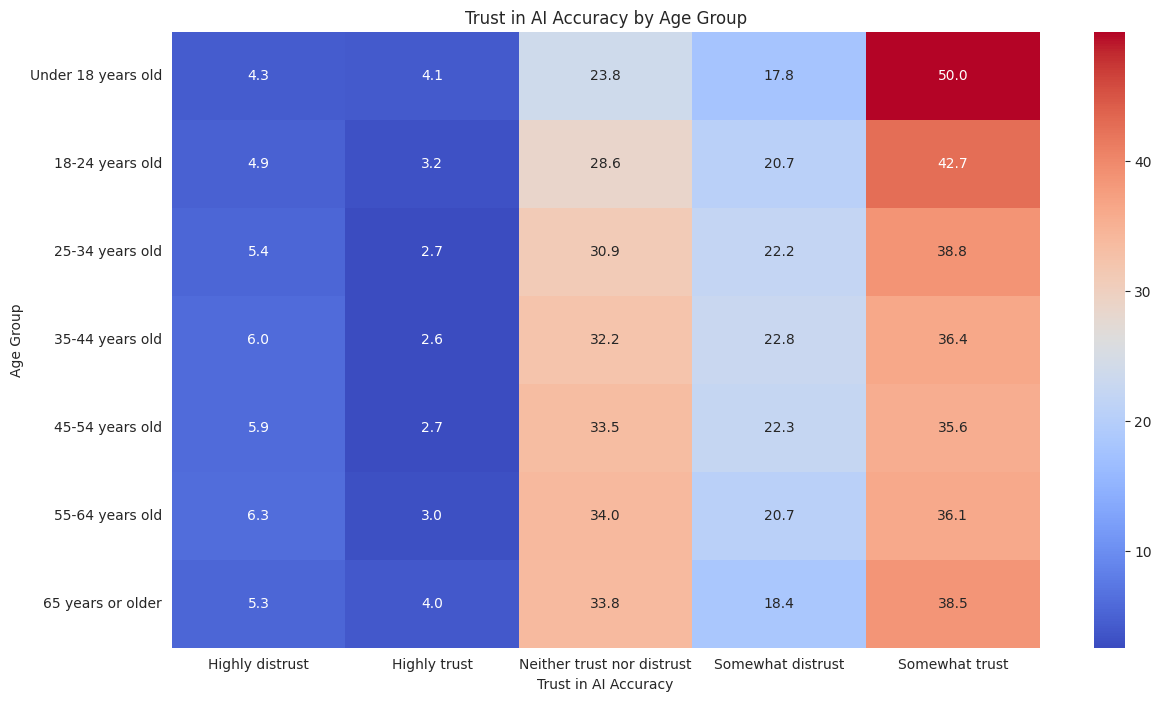

In [ ]:
# Create a pivot table with counts of sentiments for each age group
pivot_table = age_df.pivot_table(index='Age', columns='AIBen', aggfunc='size', fill_value=0)

# Normalize the data to get percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_percentage, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Trust in AI Accuracy by Age Group')
plt.xlabel('Trust in AI Accuracy')
plt.ylabel('Age Group')
plt.show()

Here are some insights:

From the heatmap, it seems that people, in general, are skeptical about AI's accuracy. About 70% of respondents across all age categories either have no strong opinion (indicating 'Neither trust nor distrust') or 'Somewhat trust' AI. This reflects a cautious optimism or a wait-and-see approach towards AI technologies.

A surprising observation is that those under 18 and those older than 65 are among the groups who trust the accuracy of AI slightly more than those from the age groups 18-64. This could be due to several factors:

(i) Younger respondents might be more open and adaptable to new technologies, growing up in an era where AI is becoming more integrated into everyday life. Their educational environments might also emphasize the potential and innovation in AI, fostering a more trusting attitude.

(ii) Older respondents who continue to work with technology might have seen numerous technological advancements over the years, leading to a certain level of trust in new innovations. Additionally, they might use AI tools in a limited but effective manner, reinforcing their trust.

(iii) This group shows more skepticism, possibly because they are actively involved in the practical applications of AI and are more aware of its current limitations and inaccuracies. Their professional experiences might make them more critical of AI's capabilities.

(iv) The fact that a significant percentage of respondents across all age groups either 'Somewhat trust' or 'Neither trust nor distrust' AI tools highlights a general skepticism. This could stem from well-documented instances where AI has failed or produced biased outcomes, influencing public perception.

(v)  The moderate levels of trust and the significant portion of respondents who are neutral indicate a potential for growth in trust as AI technologies improve and become more reliable. Increased transparency, successful case studies, and better user education can help in building this trust.

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

***1. What are the most popular programming languages in 2023?***

Note that developers were allowed to choose multiple options here.

In [ ]:
survey_df["LanguageHaveWorkedWith"].unique()

array([nan, 'HTML/CSS;JavaScript;Python', 'Bash/Shell (all shells);Go',
       ..., 'Bash/Shell (all shells);C#;C++;Cobol;Groovy;PHP;PowerShell',
       'Assembly;Bash/Shell (all shells);C;C#;Python;Rust;SQL',
       'Bash/Shell (all shells);C#;HTML/CSS;Java;JavaScript;Lua;Objective-C;PowerShell;Python;Solidity;SQL'],
      dtype=object)

In [ ]:
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

This shows that 51 langauges were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [ ]:
percentiles6 = languages_worked_df.mean().sort_values(ascending = False)*100

Now, let's plot this using a horizontal bar chart.

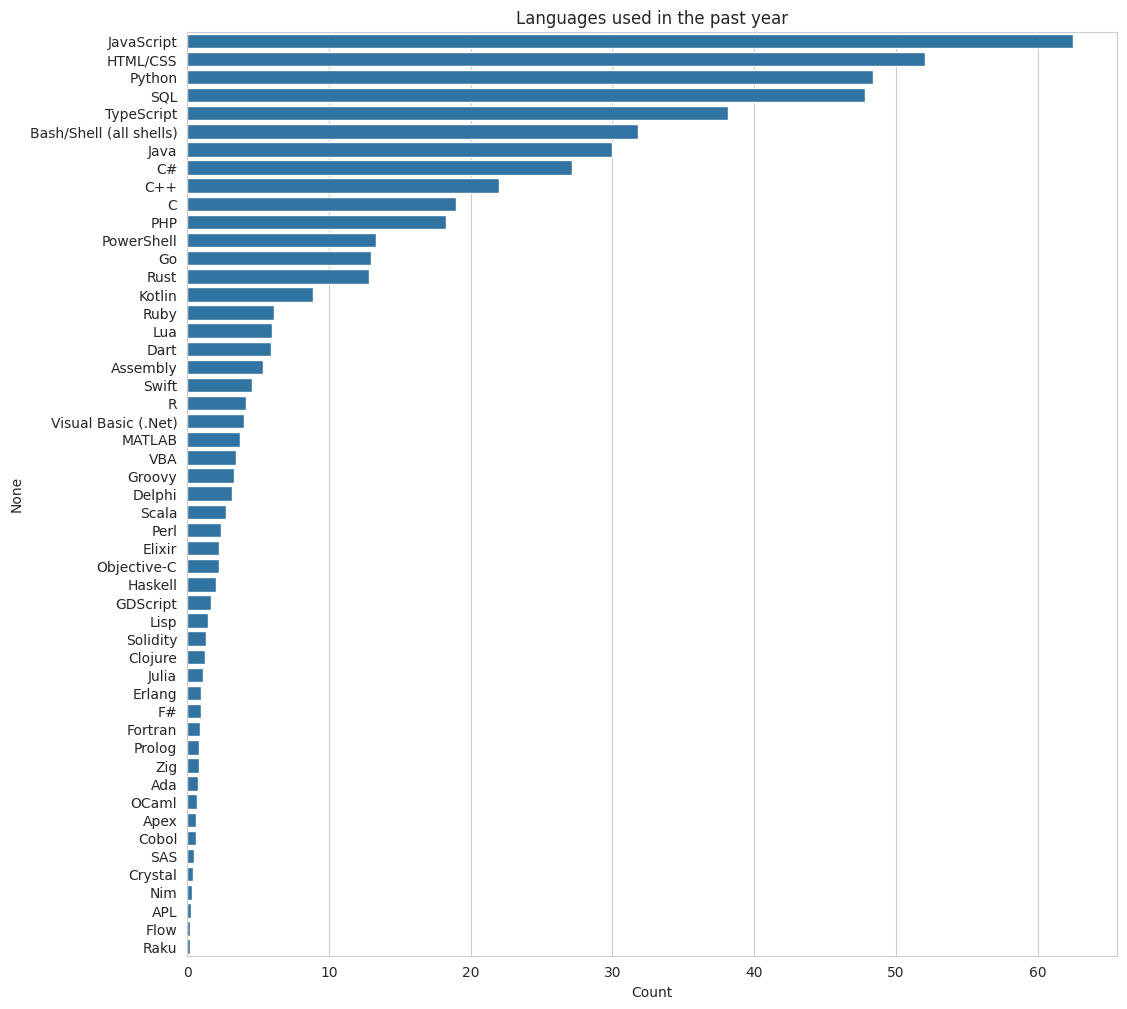

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=percentiles6, y=percentiles6.index)
plt.title("Languages used in the past year");
plt.xlabel('Count');

In 2023, JavaScript remains the most popular programming language, dominating the landscape with 62.5% of respondents using it. Web development technologies like HTML/CSS (52.0%) and JavaScript lead the field, highlighting the focus on web technologies. Python follows closely at 48.4%, reflecting its versatility and extensive use in data science and machine learning. SQL (47.8%) underscores the essential role of database management, while TypeScript (38.2%) is growing rapidly due to its robustness. Traditional languages like Java (30.0%) and C# (27.1%) continue to be significant, while newer languages like Rust (12.8%) and Go (13.0%) are gaining traction for their performance and safety features. The diversity of programming languages in use reflects the varied demands of modern software development.

The data is very similar to the 2020 Stack Overflow data. One significant observation is the rise of Rust as a prominent programming language over the years.

***2. What are the most common languages used by developers in India?***

In [ ]:
languages_India_df = survey_df[survey_df["Country"]== "India"]

In [ ]:
languages_worked_df = split_multicolumn(languages_India_df.LanguageHaveWorkedWith)

language_frequency = languages_worked_df.sum().sort_values(ascending=False)

language_percentage = (language_frequency / languages_India_df.shape[0]) * 100

print(language_percentage.head(10))

JavaScript                 66.524444
HTML/CSS                   56.142222
Python                     49.653333
SQL                        42.666667
Java                       37.866667
TypeScript                 30.791111
C++                        27.342222
C                          26.168889
Bash/Shell (all shells)    18.311111
PHP                        17.084444
dtype: float64


Similar to the most common language in general, JavaScript is the most common programming language used by developers in India, followed by HTML/CSS.

***3. What are the most common languages among respondents who do not describe themselves as "Developer, front-end"?***

In [ ]:
non_dev_df = survey_df[survey_df["DevType"] != "Developer, front-end"]

In [ ]:
non_dev_languages_df = split_multicolumn(non_dev_df.LanguageHaveWorkedWith)

non_dev_language_frequency = non_dev_languages_df.sum().sort_values(ascending=False)

non_dev_language_percentage = (non_dev_language_frequency / non_dev_languages_df.shape[0]) * 100

print(non_dev_language_percentage.head(10))

JavaScript                 60.709997
HTML/CSS                   50.370335
Python                     50.033883
SQL                        49.195725
TypeScript                 36.225078
Bash/Shell (all shells)    32.656070
Java                       30.871566
C#                         27.886296
C++                        22.865669
C                          19.750811
dtype: float64


Javascript continues to be at the top of the list, this time it is the major language used by respondents who do not describe themselves as "Developer, front-end"

***4. Which languages are the most people interested to learn over the next year?***

In [ ]:
languages_interested_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages.head(10)

JavaScript                 39.229010
Python                     38.925144
TypeScript                 36.167922
HTML/CSS                   33.557589
SQL                        33.187567
Rust                       29.949318
C#                         20.847910
Bash/Shell (all shells)    20.495829
Go                         20.175144
Java                       16.128454
dtype: float64

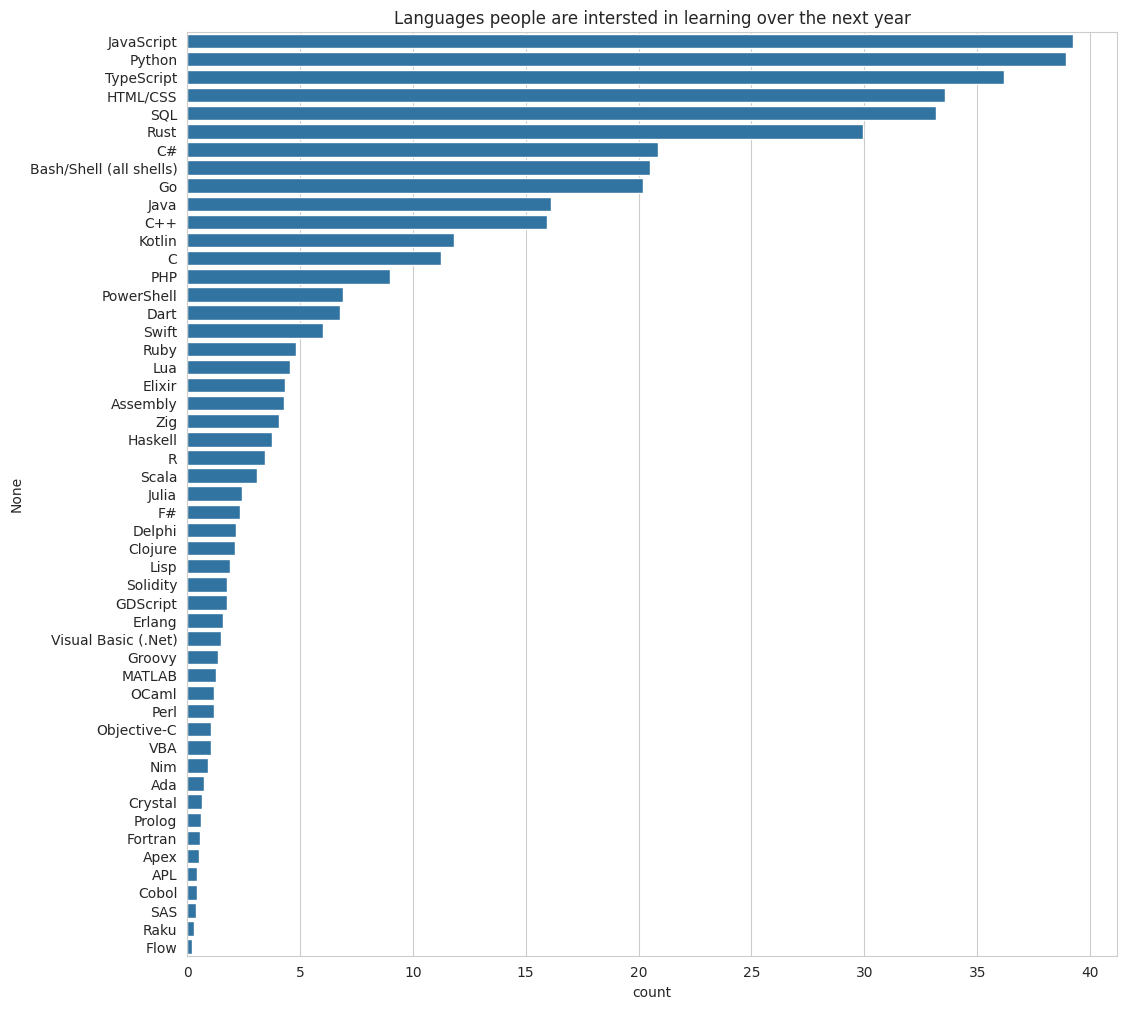

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

JavaScript leads the list of languages that developers are most interested in learning over the next year, closely followed by Python and TypeScript, highlighting a strong focus on web development and modern programming practices. Python is the second most popular language people are interested in learning. Its versatility, ease of use, and applicability across domains like data analysis, machine learning, and web development make it an essential tool for developers. HTML/CSS and SQL also feature prominently, indicating an ongoing need for foundational web and database skills. Notably, Rust has emerged significantly, ranking above traditionally popular languages like C#, C++, and Java, suggesting a growing interest in its performance and safety features. This trend underscores the programming community's shift towards modern, efficient, and secure languages.

***5. Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?***

In [ ]:
languages_loved_df = languages_worked_df & languages_interested_df

In [ ]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)


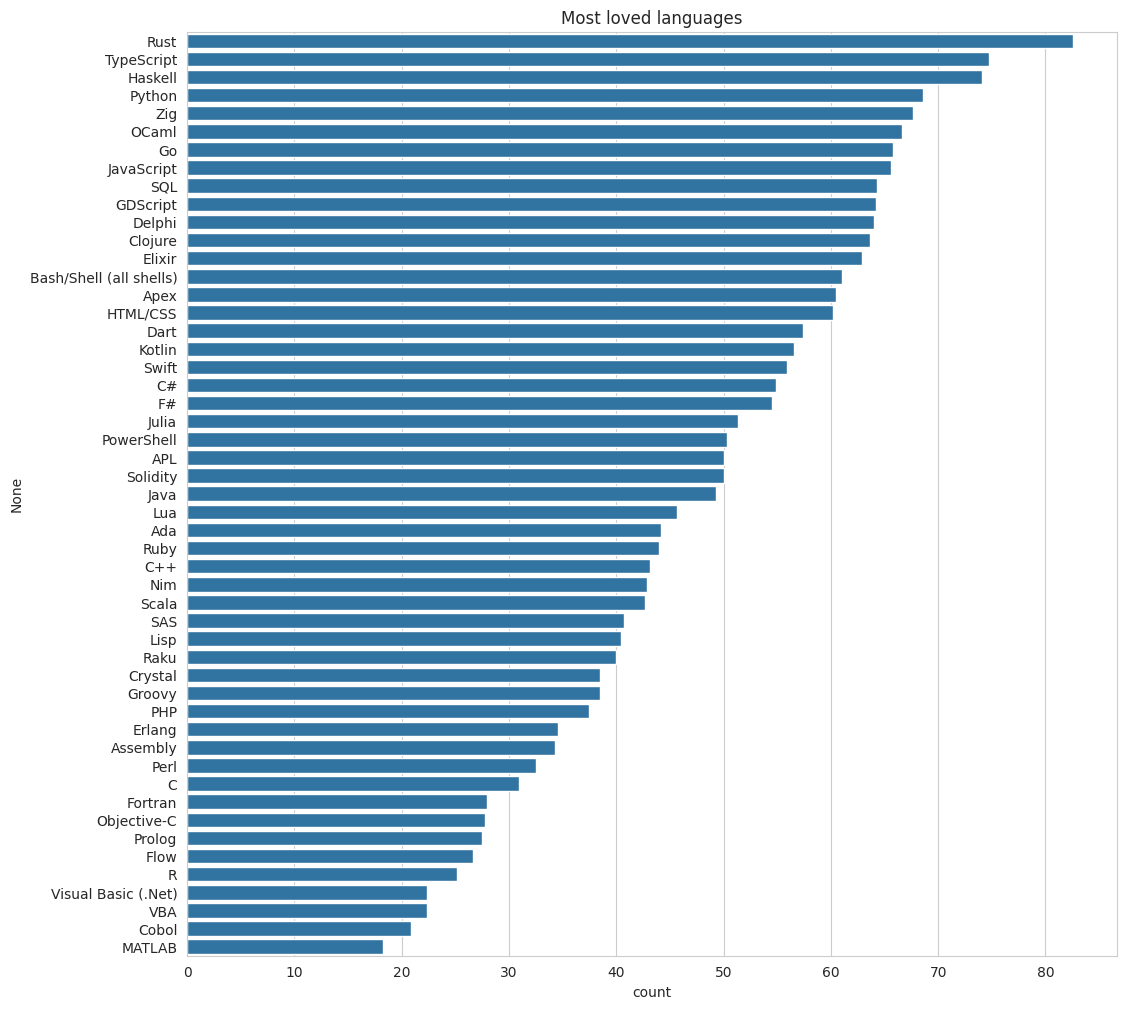

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

Rust has been Stack Overflow's most-loved language for seven consecutive years, highlighting its robust performance and growing developer community. The second most-loved language is TypeScript, a favored alternative to JavaScript, offering enhanced type safety and improved developer experience for web development. Haskell, known for its strong focus on functional programming and mathematical precision, comes in third. Despite being one of the most widely-used languages globally, Python secures the fourth spot. Its popularity stems from its ease of learning and use, a vast ecosystem of domain-specific libraries, and a large, supportive global community. This widespread affection underscores Python's solid foundation and versatility in fields like data analysis, machine learning, and web development.

***6. What are the most dreaded languages, i.e., languages which people have used in the past year but do not want to learn/use over the next year.***

In [ ]:
dreaded_languages = languages_worked_df & ~languages_interested_df
dreaded_languages_percentages = (dreaded_languages.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)
dreaded_languages_percentages.head(10)

MATLAB                 81.746032
Cobol                  79.166667
VBA                    77.678571
Visual Basic (.Net)    77.637131
R                      74.860335
Flow                   73.333333
Prolog                 72.500000
Objective-C            72.268908
Fortran                72.000000
C                      69.089674
dtype: float64

MATLAB leads the list as the most dreaded language, with 81.7% of respondents indicating they have used it in the past year but do not wish to continue using it. Cobol follows closely at 79.2%, likely due to its age and complexity. VBA and Visual Basic (.Net) also have high dread percentages, at 77.7% and 77.6%, respectively, reflecting a shift away from these older technologies. R, despite its use in data analysis, is dreaded by 74.9% of respondents, possibly due to competition from Python. Other languages like Flow, Prolog, Objective-C, Fortran, and C also feature prominently, suggesting a preference for more modern and versatile languages in the developer community.

***7. What is the most common AI powered search tool in 2023***

In [ ]:
search_tools_df = split_multicolumn(survey_df.AISearchHaveWorkedWith)
search_tools_df

,ChatGPT,Google Bard AI,Neeva AI,Bing AI,WolframAlpha,Andi,Phind,You.com,Perplexity AI,Quora Poe,Metaphor
0,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
89179,True,False,False,False,False,False,False,False,False,False,False
89180,True,False,False,False,False,False,False,False,False,False,False
89181,True,False,False,False,False,False,False,False,False,True,False
89182,True,False,False,True,True,False,False,False,False,False,False


This shows that 11 tools were included among the options. Let's aggregate these to identify the percentage of respondents who selected each tool.


In [ ]:
percentiles7 = search_tools_df.mean().sort_values(ascending = False)*100

Now, let's plot this using a horizontal bar chart.

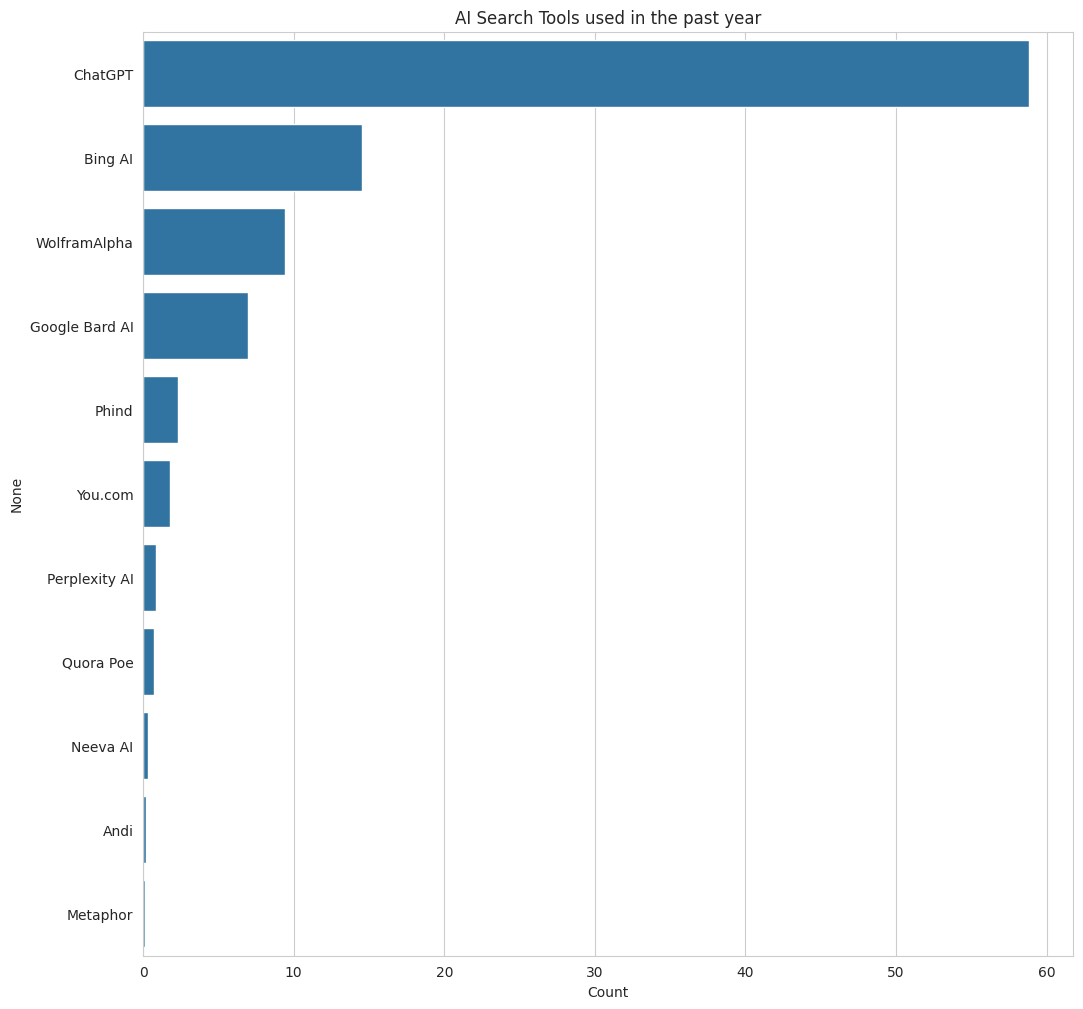

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=percentiles7, y=percentiles7.index)
plt.title("AI Search Tools used in the past year");
plt.xlabel('Count');

ChatGPT is the most common AI-powered search tool in 2023, commanding a significant lead with 58.8% of respondents using it. This reflects its widespread adoption and effectiveness in providing comprehensive and accurate answers. Bing AI comes in second at 14.6%, showing Microsoft's strong push into the AI search market. WolframAlpha, known for its computational capabilities, holds 9.4%, while Google Bard AI, another major player, has 7%. Tools like Phind, You.com, Perplexity AI, Quora Poe, and others have smaller but notable user bases, indicating a diverse landscape of AI search tools that cater to different needs and preferences.

***8. What is the AI powered search tool that people want to work with***

In [ ]:
new_search_tools_df = split_multicolumn(survey_df.AISearchWantToWorkWith)
new_search_tools_df

,ChatGPT,Neeva AI,Perplexity AI,Bing AI,Google Bard AI,Phind,WolframAlpha,Quora Poe,Andi,You.com,Metaphor
0,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
89179,True,False,False,False,False,False,False,False,False,False,False
89180,True,False,False,False,False,False,False,False,False,False,False
89181,True,False,False,False,False,False,False,True,False,False,False
89182,True,False,False,True,True,False,False,False,False,False,False


In [ ]:
percentiles8 = new_search_tools_df.mean().sort_values(ascending = False)*100

Now, let's plot this using a horizontal bar chart.

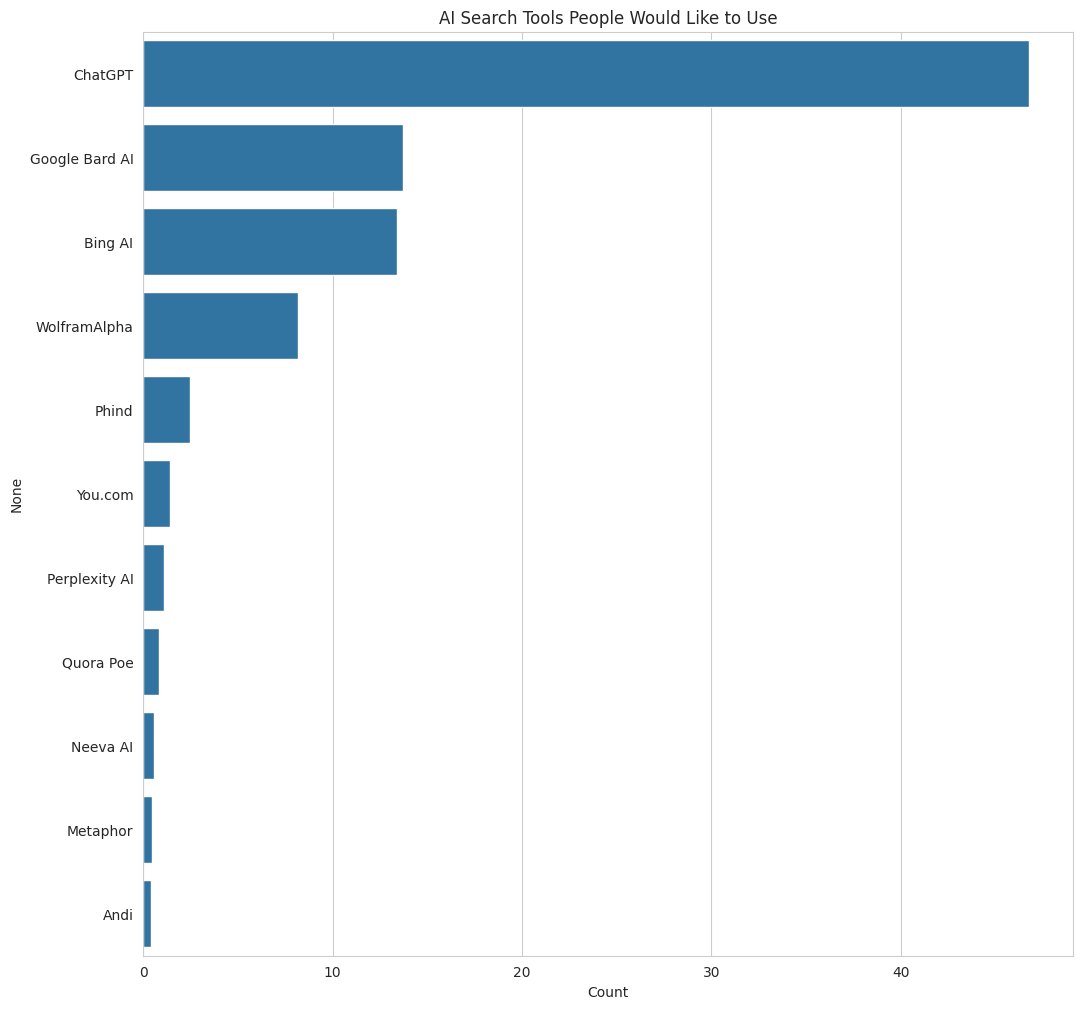

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=percentiles8, y=percentiles8.index)
plt.title("AI Search Tools People Would Like to Use");
plt.xlabel('Count');

***9. What are the most important benefits that the developers aim to acheive using AI tools?***

In [ ]:
schema.AIAcc

'For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? Please check all that apply.'

In [ ]:
AI_ben_df = split_multicolumn(non_dev_df.AIAcc)

AI_ben_frequency = AI_ben_df.sum().sort_values(ascending=False)

AI_ben_percentage = (AI_ben_frequency / AI_ben_df.shape[0]) * 100

print(AI_ben_percentage.head(10))

Increase productivity         36.061013
Speed up learning             27.699642
Greater efficiency            27.423823
Improve accuracy in coding    14.476954
Improve collaboration          4.083792
Other (please explain)         2.374187
dtype: float64


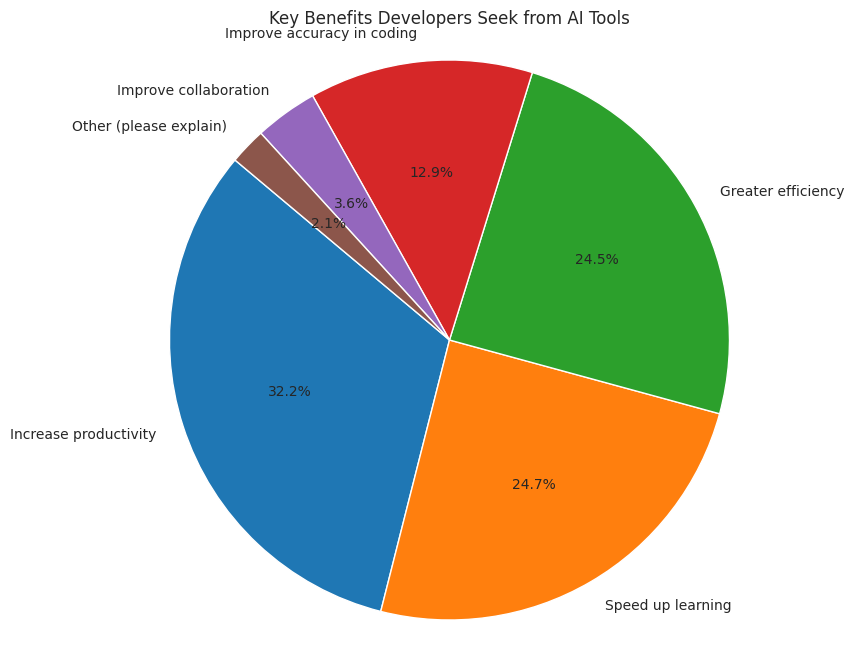

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(AI_ben_percentage, labels= AI_ben_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Key Benefits Developers Seek from AI Tools')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Developers primarily aim to use AI tools to increase productivity, with 36.1% identifying this as their main benefit. Speeding up learning and achieving greater efficiency are also significant goals, each highlighted by around 27% of respondents. Improving accuracy in coding is a priority for 14.5%, indicating a desire for precision in their work. Enhancing collaboration is less commonly cited at 4.1%, while a small percentage (2.4%) have other unique benefits in mind. This data underscores that efficiency and productivity are the driving forces behind the adoption of AI tools in development.

***10. What are most popular online courses or certifications used by developers to learn code?***

In [ ]:
online_tools_df = split_multicolumn(survey_df.LearnCodeCoursesCert)
online_tools_df

,Other,Codecademy,edX,Udemy,Pluralsight,Coursera,Udacity,Skillsoft
0,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
89179,False,False,False,True,False,False,False,False
89180,False,False,False,False,False,False,False,False
89181,False,True,False,False,False,True,False,False
89182,False,False,False,True,False,False,False,False


This shows that 8 organizations were included among the options. Let's aggregate these to identify the percentage of respondents who selected each organization.


In [ ]:
percentiles9 = online_tools_df.mean().sort_values(ascending = False)*100

Now, let's plot this using a horizontal bar chart.


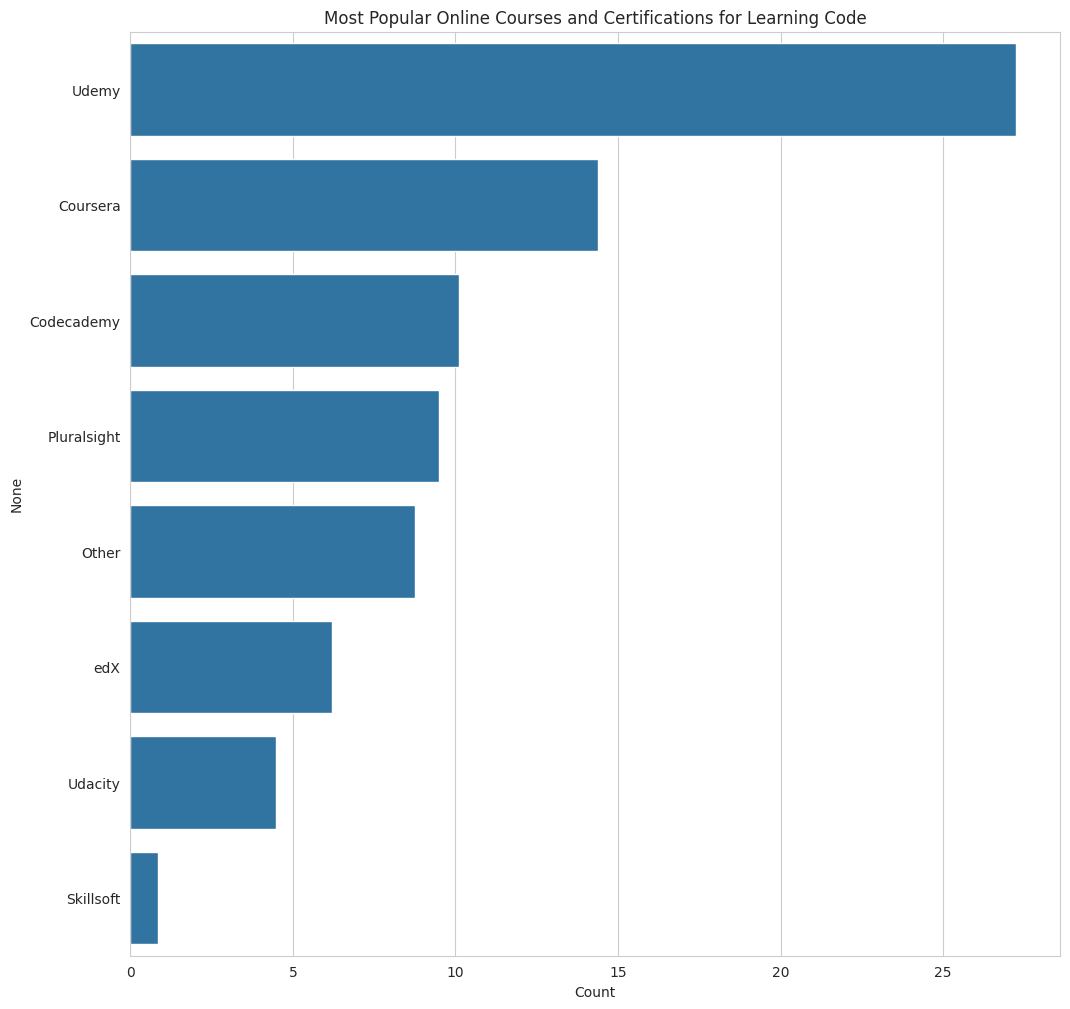

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=percentiles9, y=percentiles9.index)
plt.title("Most Popular Online Courses and Certifications for Learning Code");
plt.xlabel('Count');

The data reveals a clear preference among developers for specific online learning platforms. Udemy is the most popular choice, with 27.24% of respondents using it to learn coding. This popularity can be attributed to Udemy's extensive library of courses, flexibility, and affordability.

Following Udemy, Coursera is the second most preferred platform, used by 14.39% of respondents. Coursera's collaboration with top universities and institutions likely boosts its credibility and attractiveness.

Codecademy and Pluralsight are also notable mentions, with 10.11% and 9.49% usage respectively. Codecademy is known for its interactive learning approach, which appeals to beginners, while Pluralsight is favored for its advanced technical courses and comprehensive learning paths.

Interestingly, Other platforms collectively account for 8.76%, indicating a significant number of developers are using various niche or lesser-known platforms. This diversity in learning sources highlights the vast array of available resources catering to different learning preferences and needs.

edX and Udacity are also popular, with 6.21% and 4.48% of respondents using them. edX, similar to Coursera, offers university-level courses, while Udacity is renowned for its "nanodegree" programs that provide in-depth, project-based learning.

Finally, Skillsoft is used by 0.85% of respondents, showing it is a less common choice among developers but still valued by a segment of the community.

# Inferences and Conclusions

### Summary of Findings


We've drawn numerous insights from the 2023 Stack Overflow Developer Survey. Here's a summary of the key findings:

**Country Representation:**

1. Dominance of English-Speaking Countries: The survey has a significant representation from English-speaking countries, with 53.34% of responses from these regions. This highlights a potential bias towards English-speaking developers, although the percentage has decreased from previous years, indicating growing participation from non-English-speaking countries.


**Demographics:**

1. Age Distribution: The majority of respondents fall within the 25-34 age range (37.28%), followed by the 35-44 age range (23.02%). This suggests a significant presence of early to mid-career professionals in the survey.
2. Education Level: A large portion of respondents hold a bachelor's degree (41.13%) or a master's degree (23.08%). However, there is also substantial representation from those with some college education or high school education, indicating diverse educational backgrounds among developers.

**Employment:**
1. Full-Time Employment: The majority of respondents (59.75%) are employed full-time. Freelancers and self-employed individuals make up 13.72% of the respondents, reflecting the flexible nature of work in the tech industry.
2. Remote Work Trends: Hybrid and fully remote work arrangements are prevalent, particularly among full-time employees and freelancers. This indicates a lasting shift towards flexible work models in the tech industry.

**Programming Languages:**
1. Most Popular Languages: JavaScript (62.5%) remains the most widely used programming language, followed by HTML/CSS (52.0%) and Python (48.4%). This underscores the dominance of web development technologies.
2. Interest in Learning Languages: Developers show significant interest in learning JavaScript, Python, and TypeScript. Rust also ranks high in interest, indicating its growing popularity.
3. Most Loved Languages: Rust is the most loved language, followed by TypeScript and Haskell. Despite its widespread use, Python is also highly loved due to its versatility and ease of use.
4. Most Dreaded Languages: MATLAB, Cobol, and VBA are the most dreaded languages, with a high percentage of respondents indicating they do not wish to continue using them.

**AI Tools and Technologies:**
1. Adoption of AI Tools: Less than half of the respondents currently use AI tools in their development process. However, there is significant interest in adopting AI tools in the future.
2. Sentiment Towards AI: Over 76% of respondents view AI technologies positively, indicating widespread optimism about AI's potential. However, there is still some skepticism and uncertainty about AI's accuracy and reliability.
3. Most Common AI Search Tools: ChatGPT is the most widely used AI-powered search tool, followed by Bing AI and WolframAlpha.
4. AI Tools People Want to Work With: ChatGPT remains the most desired AI tool to work with, followed by Google Bard AI and Bing AI.

**Learning Resources:**
1. Online Learning Platforms: Udemy is the most popular platform for learning to code (27.24%), followed by Coursera (14.39%) and Codecademy (10.11%). This highlights the importance of online resources in the education of developers.

### Ideas for Future Work:

* **Expand Analysis to Include More Variables:** Incorporate additional factors such as job satisfaction, income levels, and geographical trends to provide a more comprehensive analysis.
* **In-Depth Study of AI Adoption:** Explore the barriers to AI adoption and investigate strategies to increase trust and accuracy in AI tools.
* **Longitudinal Analysis:** Conduct a longitudinal study to track changes in developer trends and preferences over time.
* **Global Participation:** Encourage broader participation from non-English-speaking countries to ensure a more representative survey.
* **Predictive Modeling:** Develop machine learning models to predict future trends in programming languages and technologies based on historical data.
* **Diversity and Inclusion:** Investigate the representation of various demographic groups, including gender, ethnicity, and socioeconomic background, in the programming community. Identify barriers to entry and success for underrepresented groups.
* **Regional Trends:** Analyze regional variations in programming language preferences, technology adoption, and employment patterns to uncover localized trends and challenges.
* **Productivity and Job Satisfaction:** Assess how remote work impacts productivity, job satisfaction, work-life balance, and career progression among developers.
* **Remote Work Tools:** Evaluate the usage and effectiveness of various remote work tools and platforms in facilitating collaboration and productivity.
* **Sector Analysis:** Investigate programming trends and technology adoption in specific sectors such as healthcare, finance, education, and entertainment. Identify sector-specific challenges and opportunities.

### Useful Resources:

* Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* opendatasets Python library: https://github.com/JovianML/opendatasets